<a href="https://colab.research.google.com/github/aimlalchemists/personal-loan-campaign-modelling/blob/main/AllLife_Bank_Personal_Loan_Campign_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<span style="font-family: Helvetica; font-weight:bold;font-size:2.5em;color:navy">Machine Learning: AllLife Bank Personal Loan Campaign</span>

<span style="font-family: Helvetica; font-weight:bold;font-size:1.5em;color:green">Muthuraman Muthusubramanian</span>




<span style="font-family: Helvetica; font-weight:bold;font-size:2.5em;color:navy">Problem Statement</span>

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

In [138]:
# verify the version numbers of packages installed.
!pip freeze | grep numpy
!pip freeze | grep pandas
!pip freeze | grep matplotlib
!pip freeze | grep seaborn
!pip freeze | grep scikit-learn
!pip freeze | grep scipy

numpy==1.25.2
geopandas==0.13.2
pandas==2.0.3
pandas-datareader==0.10.0
pandas-gbq==0.19.2
pandas-stubs==2.0.3.230814
sklearn-pandas==2.2.0
matplotlib==3.7.1
matplotlib-inline==0.1.7
matplotlib-venn==0.11.10
seaborn==0.13.1
scikit-learn==1.2.2
scipy==1.11.4


In [139]:
# install necessary libraries.
!pip install numpy pandas matplotlib seaborn scikit-learn sklearn-pandas -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

<span style="font-family: Helvetica; font-weight:bold;font-size:2.5em;color:navy">Importing necessary libraries</span>

In [140]:
# Import libraries to read and manipulate the data
import pandas as pd
import numpy as np
# Import plotting libraries for visuals and statistic analysis.
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
# Import libraries for model predictions and decision trees.
from sklearn import metrics, tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

# To get different metrics scores
from sklearn.metrics import (confusion_matrix, classification_report,
                             accuracy_score, precision_score, recall_score, f1_score)

# To ignore the warnings.
import warnings
warnings.filterwarnings("ignore")

# Import drive libraries to get data from google drive.
from google.colab import drive
drive.mount('/content/drive')

# Allows plots created with Matplotlib to be displayed directly in the notebook.
%matplotlib inline

# Sets the default parameters for plots.
sns.set()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<span style="font-family: Helvetica; font-weight:bold;font-size:2.5em;color:navy">Loading the dataset</span>

In [141]:
# read the data.
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/csv-files/Loan_Modelling.csv")

# copy the data into df
df = data.copy()

# count of records.
print(f"There is {df.shape[0]} rows and {df.shape[1]} columns in this dataset.")

There is 5000 rows and 14 columns in this dataset.


In [142]:
# check first 5 rows of data
df.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [143]:
# get the last 5 rows of data.
df.tail()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

<span style="font-family: Helvetica; font-weight:bold;font-size:2.5em;color:navy">Data Overview</span>

In [144]:
# Understand the not null, count and data type of the 14 columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### observations

- 13 columns int64 and one column float64.
- Personal_Loan is the dependent variable.
- Totally 5000 entries
- The Education and Family columns are currently an INT64 data type. This might not be suitable as those are often categorical, not numerical. Need to consider revising the data type for better data representation

In [145]:
# Describe the data
df.describe()

ID          Age   Experience       Income       ZIPCode  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93169.257000   
std    1443.520003    11.463166    11.467954    46.033729   1759.455086   
min       1.000000    23.000000    -3.000000     8.000000  90005.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal_Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities_Account  CD_Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

In [146]:
# convert the Family and Education as Category column.
df.Family = df.Family.astype("category")
df.Education = df.Education.astype("category")

In [147]:
df.describe().T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
CCAvg                   1.5      2.50     10.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

### Observations
- Looks like there are no missing values as per the count column. Still need to verify and confirm if there are any inappropriate values present.
- ID column may not be required if its just a sequence of numbers.
- Age values stand between 23 and 67, with an average of 45.
- Experience shows -3 as minimum, sounds incorrect.
- Not able to get a clarity on CreditCard column. If that's a boolean column, then better to change the name as HasCreditCard or IsCreditCardHolder.

In [148]:
# check for duplicates
df.duplicated().sum()

0

In [149]:
# check for na values
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

### Observations
- No duplicates or na values

In [150]:
# Drop the ID column as that's not giving any value add in the data.
df.drop("ID", axis=1, inplace=True)

In [151]:
df.describe(include='all').T

count  unique  top    freq          mean          std  \
Age                 5000.0     NaN  NaN     NaN     45.338400    11.463166   
Experience          5000.0     NaN  NaN     NaN     20.104600    11.467954   
Income              5000.0     NaN  NaN     NaN     73.774200    46.033729   
ZIPCode             5000.0     NaN  NaN     NaN  93169.257000  1759.455086   
Family              5000.0     4.0  1.0  1472.0           NaN          NaN   
CCAvg               5000.0     NaN  NaN     NaN      1.937938     1.747659   
Education           5000.0     3.0  1.0  2096.0           NaN          NaN   
Mortgage            5000.0     NaN  NaN     NaN     56.498800   101.713802   
Personal_Loan       5000.0     NaN  NaN     NaN      0.096000     0.294621   
Securities_Account  5000.0     NaN  NaN     NaN      0.104400     0.305809   
CD_Account          5000.0     NaN  NaN     NaN      0.060400     0.238250   
Online              5000.0     NaN  NaN     NaN      0.596800     0.490589   
CreditCard          5000.0     NaN  NaN     NaN      0.294000     0.455637   

                        min      25%      50%      75%      max  
Age                    23.0     35.0     45.0     55.0     67.0  
Experience             -3.0     10.0     20.0     30.0     43.0  
Income                  8.0     39.0     64.0     98.0    224.0  
ZIPCode             90005.0  91911.0  93437.0  94608.0  96651.0  
Family                  NaN      NaN      NaN      NaN      NaN  
CCAvg                   0.0      0.7      1.5      2.5     10.0  
Education               NaN      NaN      NaN      NaN      NaN  
Mortgage                0.0      0.0      0.0    101.0    635.0  
Personal_Loan           0.0      0.0      0.0      0.0      1.0  
Securities_Account      0.0      0.0      0.0      0.0      1.0  
CD_Account              0.0      0.0      0.0      0.0      1.0  
Online                  0.0      0.0      1.0      1.0      1.0  
CreditCard              0.0      0.0      0.0      1.0      1.0

### Observatinos
- There are 4 unique values for Family and 3 unique values for Education.
- There are only two unique values in Personal_Loan, Securities_Account, cd_Account, online and CreditCard columns.
- Age column has an average value of 45 with a standard deviation of approximately 11.4. The ages range from 23 to 67.
- Experience column has an average of 20 years with a standard deviation of 11.5 years. The experience ranges from -3 to 43 years. We will further examine the negative value.
- Income column has an average of 74K with a standard deviation of 46K. The income values span from 8K to 224K.
- Ccavg column has an average of 1.93 with a standard deviation of 1.7. The values in this column range from 0.0 to 10.0.
- Mortgage column has an average of 56.5K with a standard deviation of 101K. The standard deviation is larger than the mean, which warrants further investigation.
- There are zero values present in the mortgage column, which we will also inspect

<span style="font-family: Helvetica; font-weight:bold;font-size:2.5em;color:navy">Exploratory Data Analysis.</span>

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

<span style="font-family: Helvetica; font-weight:bold;font-size:2.5em;color:navy">Univariant Analysis.</span>

In [152]:
def detect_outliers(column: str, dataframe=df):
    """
    This function returns a DataFrame object of outliers in a specified feature.
    column: 1-dimensional feature array
    dataframe: pandas DataFrame (default is df)
    """
    # Calculate the first quartile of the feature
    Q1 = dataframe[column].quantile(0.25)

    # Calculate the third quartile of the feature
    Q3 = dataframe[column].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify the outliers
    outliers = dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)]

    return outliers


### Observations on age


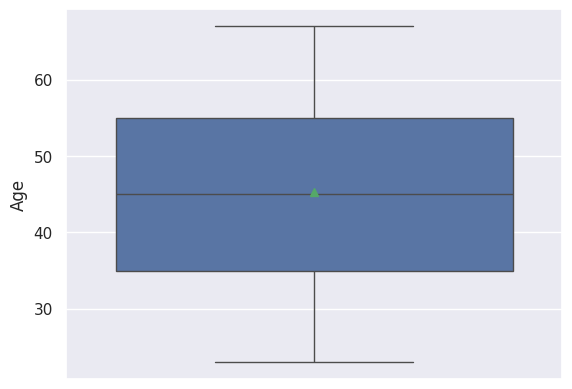

In [153]:
sns.boxplot(df.Age, showmeans=True)
plt.show()

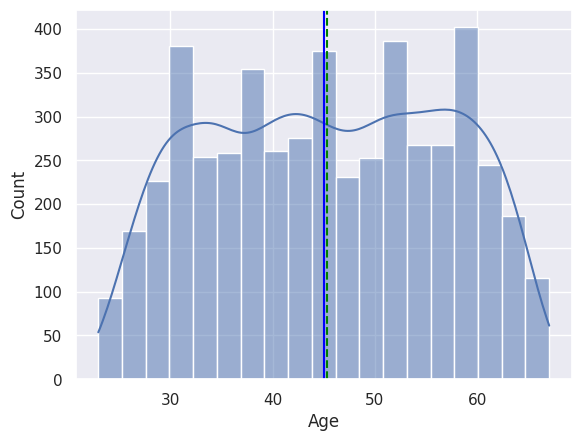

In [154]:
ax = sns.histplot(df.Age, kde=True)
ax.axvline(np.mean(df.Age), color='green', linestyle='--')
ax.axvline(np.median(df.Age), color='blue', linestyle='-')
plt.show()

- The age column does not contain any outliers.
- The average and median values are closely aligned.
- The mean age is approximately 45 years.
- The distribution of ages is evenly spread out.

### Observations on income

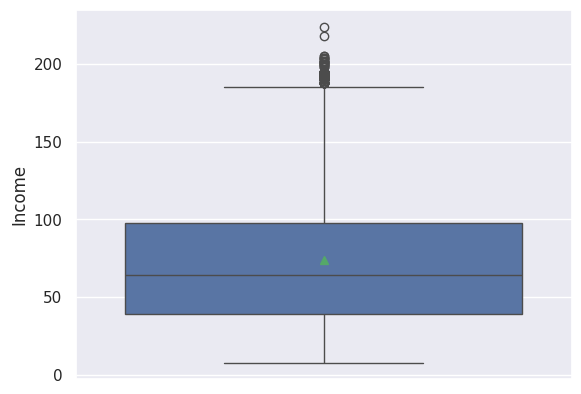

In [155]:
sns.boxplot(df.Income, showmeans=True)
plt.show()

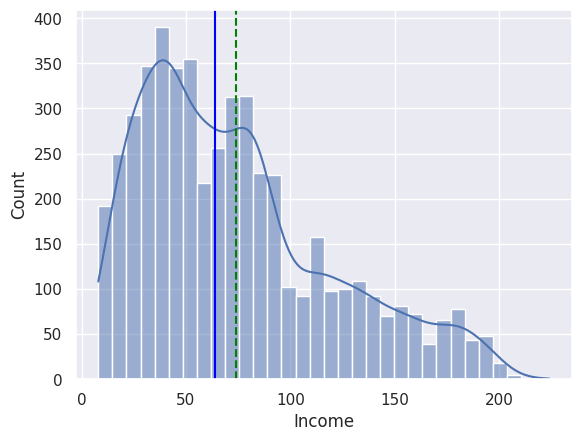

In [156]:
ax = sns.histplot(df.Income, kde=True)
ax.axvline(np.mean(df.Income), color='green', linestyle='--')
ax.axvline(np.median(df.Income), color='blue', linestyle='-')
plt.show()

In [157]:
outliers = detect_outliers('Income')
outliers.sort_values(by='Income', ascending=False).head(20)

Age  Experience  Income  ZIPCode Family  CCAvg Education  Mortgage  \
3896   48          24     224    93940      2   6.67         1         0   
4993   45          21     218    91801      2   6.67         1         0   
526    26           2     205    93106      1   6.33         1       271   
2988   46          21     205    95762      2   8.80         1       181   
4225   43          18     204    91902      2   8.80         1         0   
677    46          21     204    92780      2   2.80         1         0   
2278   30           4     204    91107      2   4.50         1         0   
3804   47          22     203    95842      2   8.80         1         0   
2101   35           5     203    95032      1  10.00         3         0   
787    45          15     202    91380      3  10.00         3         0   
3608   59          35     202    94025      1   4.70         1       553   
4895   45          20     201    92120      2   2.80         1         0   
2337   43          16     201    95054      1  10.00         2         0   
2447   44          19     201    95819      2   8.80         1         0   
1901   43          19     201    94305      2   6.67         1         0   
1711   27           3     201    95819      1   6.33         1       158   
1716   32           8     200    91330      2   6.50         1       565   
459    35          10     200    91107      2   3.00         1       458   
917    45          20     200    90405      2   8.80         1         0   
4659   28           4     199    92121      1   6.33         1         0   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
3896              0                   0           1       1           1  
4993              0                   0           0       1           0  
526               0                   0           0       0           1  
2988              0                   1           0       1           0  
4225              0                   0           0       1           0  
677               0                   0           0       1           0  
2278              0                   0           0       1           0  
3804              0                   0           0       1           0  
2101              1                   0           0       0           0  
787               1                   0           0       0           0  
3608              0                   0           0       0           0  
4895              0                   0           0       1           1  
2337              1                   0           0       0           1  
2447              0                   0           0       1           1  
1901              0                   1           0       1           0  
1711              0                   0           0       1           0  
1716              0                   0           0       1           0  
459               0                   0           0       0           0  
917               0                   0           0       1           1  
4659              0                   0           0       0           0

In [158]:
print(f"There are {outliers.shape[0]} outliers.")

There are 96 outliers.


- The mean income is approximately 60K, while the median income is slightly higher, around 70K.
- The distribution of income is skewed to the right, indicating that there are a significant number of individuals with income much higher than the average. - This is also evidenced by the presence of numerous outliers on the higher end of the income spectrum.
- There are 96 outliers.

### Observations on ccavg

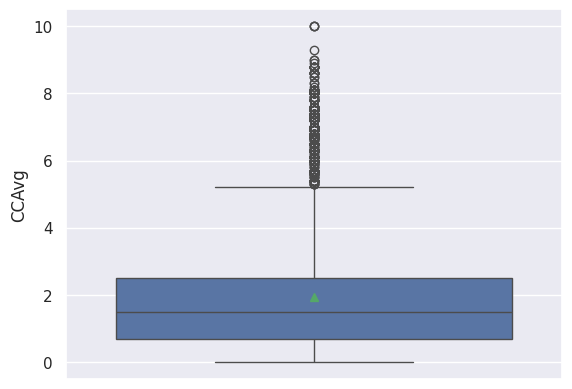

In [159]:
sns.boxplot(df.CCAvg, showmeans=True)
plt.show()

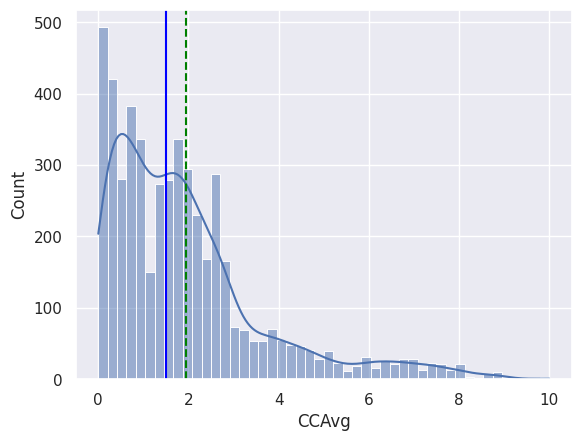

In [160]:
ax = sns.histplot(df.CCAvg, kde=True)
ax.axvline(np.mean(df.CCAvg), color='green', linestyle='--')
ax.axvline(np.median(df.CCAvg), color='blue', linestyle='-')
plt.show()

In [161]:
outliers = detect_outliers('CCAvg')
outliers.sort_values(by='CCAvg', ascending=False).head(20)

Age  Experience  Income  ZIPCode Family  CCAvg Education  Mortgage  \
2337   43          16     201    95054      1   10.0         2         0   
787    45          15     202    91380      3   10.0         3         0   
2101   35           5     203    95032      1   10.0         3         0   
3943   61          36     188    91360      1    9.3         2         0   
3822   63          33     178    91768      4    9.0         3         0   
1339   52          25     180    94545      2    9.0         2       297   
9      34           9     180    93023      1    8.9         3         0   
1277   45          20     194    92110      2    8.8         1       428   
3312   47          22     190    94550      2    8.8         1         0   
4225   43          18     204    91902      2    8.8         1         0   
2988   46          21     205    95762      2    8.8         1       181   
2447   44          19     201    95819      2    8.8         1         0   
881    44          19     154    92116      2    8.8         1         0   
917    45          20     200    90405      2    8.8         1         0   
2769   33           9     183    91320      2    8.8         3       582   
3804   47          22     203    95842      2    8.8         1         0   
1797   35          10     143    91365      1    8.6         1         0   
4156   37          12     193    92780      1    8.6         1         0   
614    37          12     180    90034      1    8.6         1         0   
4603   37          12     179    91768      1    8.6         1         0   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
2337              1                   0           0       0           1  
787               1                   0           0       0           0  
2101              1                   0           0       0           0  
3943              1                   0           0       0           0  
3822              1                   0           0       0           0  
1339              1                   0           0       1           0  
9                 1                   0           0       0           0  
1277              0                   0           0       0           0  
3312              0                   0           0       0           0  
4225              0                   0           0       1           0  
2988              0                   1           0       1           0  
2447              0                   0           0       1           1  
881               0                   0           0       1           0  
917               0                   0           0       1           1  
2769              1                   0           0       1           0  
3804              0                   0           0       1           0  
1797              0                   0           0       1           1  
4156              0                   0           0       0           0  
614               0                   0           0       1           1  
4603              0                   0           0       1           0

In [162]:
print(f"There are {outliers.shape[0]} outliers.")

There are 324 outliers.


- The ‘CCAvg’ column has a mean value of approximately 1.5 and a median value close to 2.
- The distribution of ‘CCAvg’ is skewed towards the right, indicating a higher frequency of larger values.
- Additionally, there are 324 outliers on the higher end of the ‘CCAvg’ spectrum.

### Observations on mortgage

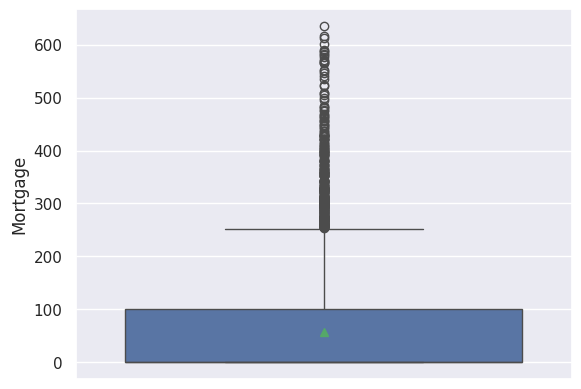

In [163]:
sns.boxplot(df.Mortgage, showmeans=True)
plt.show()

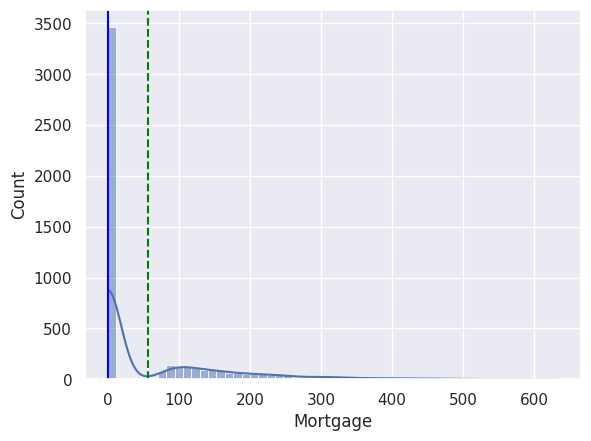

In [164]:
ax = sns.histplot(df.Mortgage, kde=True)
ax.axvline(np.mean(df.Mortgage), color='green', linestyle='--')
ax.axvline(np.median(df.Mortgage), color='blue', linestyle='-')
plt.show()

In [165]:
outliers = detect_outliers('Mortgage')
outliers.sort_values(by='Mortgage', ascending=False)

Age  Experience  Income  ZIPCode Family  CCAvg Education  Mortgage  \
2934   37          13     195    91763      2    6.5         1       635   
303    49          25     195    95605      4    3.0         1       617   
4812   29           4     184    92126      4    2.2         3       612   
1783   53          27     192    94720      1    1.7         1       601   
4842   49          23     174    95449      3    4.6         2       590   
...   ...         ...     ...      ...    ...    ...       ...       ...   
1522   25          -1     101    94720      4    2.3         3       256   
3950   38          14      62    94143      1    1.5         3       255   
2159   61          35      99    94085      1    4.8         3       255   
3138   36          11     103    93555      1    4.6         1       255   
3948   37          12     123    94304      4    3.1         2       253   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
2934              0                   0           0       1           0  
303               1                   0           0       0           0  
4812              1                   0           0       1           0  
1783              0                   0           0       1           0  
4842              1                   0           0       0           0  
...             ...                 ...         ...     ...         ...  
1522              0                   0           0       0           1  
3950              0                   0           0       1           0  
2159              1                   0           0       0           1  
3138              0                   0           0       1           0  
3948              1                   0           1       1           1  

[291 rows x 13 columns]

In [166]:
print(f"There are {outliers.shape[0]} outliers in the outlier column.")

There are 291 outliers in the outlier column.


- The ‘Mortgage’ column contains numerous entries that, while not null, have a value of zero.
- We will delve deeper into this. Additionally, the ‘Mortgage’ column exhibits a 291 outliers.

### Observation on Experience.

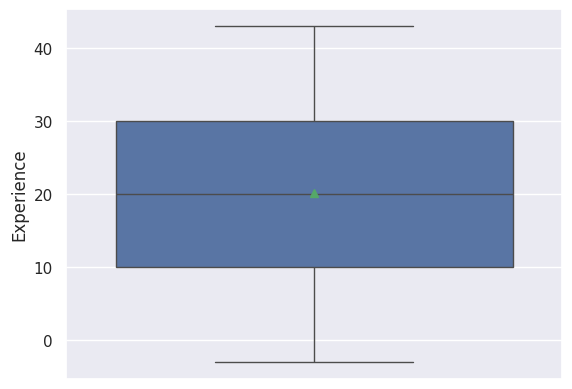

In [167]:
sns.boxplot(df.Experience, showmeans=True)
plt.show()

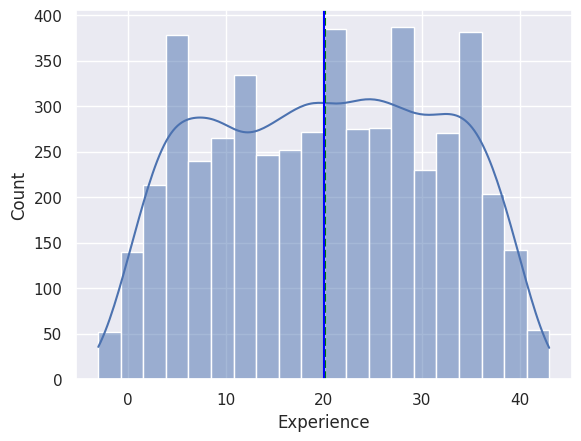

In [168]:
ax = sns.histplot(df.Experience, kde=True)
ax.axvline(np.mean(df.Experience), color='green', linestyle='--')
ax.axvline(np.median(df.Experience), color='blue', linestyle='-')
plt.show()

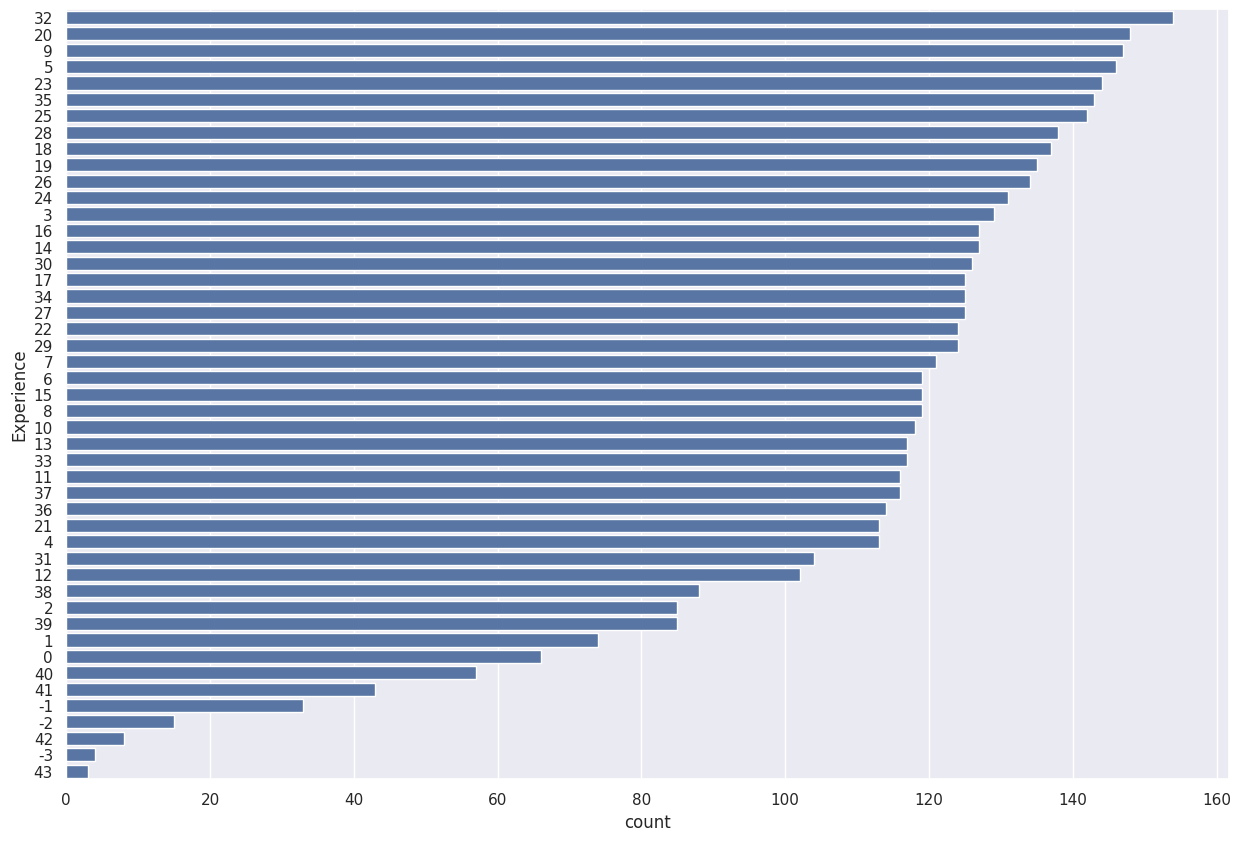

In [169]:
plt.figure(figsize=(15, 10))
sns.countplot(y=df.Experience,
              data=df,
              order=df.Experience.value_counts().index[:]);

- 32 years of experience is high in numbers.
- Plot has -1,-2 and -3 values for experience, which is incorrect.

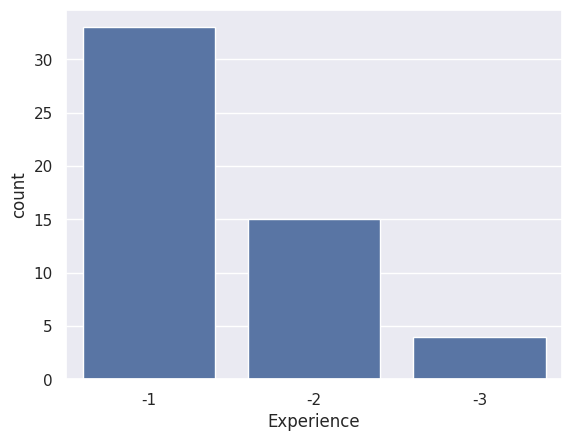

In [170]:
# Filter the dataframe to include only rows where Experience is less than 0
negative_experience = df[df['Experience'] < 0]

# Create a countplot
sns.countplot(x=negative_experience['Experience'], order=negative_experience['Experience'].value_counts().index)

# Show the plot
plt.show()


- Looks like the negative experience values are data errors.
- As the count looks like, we can safely convert these into a positive values.
- Create a new column Abs_Experience to convert the negative values to positive.

In [171]:
df['Abs_Experience'] = np.abs(df.Experience)
df.sort_values(by='Abs_Experience', ascending=False).head()

Age  Experience  Income  ZIPCode Family  CCAvg Education  Mortgage  \
2846   67          43     105    93711      4    1.7         2         0   
3886   67          43      79    95616      4    1.7         2       215   
4360   67          43      41    90024      2    1.1         1         0   
4172   67          42      75    90041      4    0.1         2       182   
734    66          42      53    92182      2    1.1         1         0   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
2846              0                   0           0       1           0   
3886              0                   0           1       1           1   
4360              0                   0           0       0           0   
4172              0                   0           0       1           0   
734               0                   0           0       1           1   

      Abs_Experience  
2846              43  
3886              43  
4360              43  
4172              42  
734               42

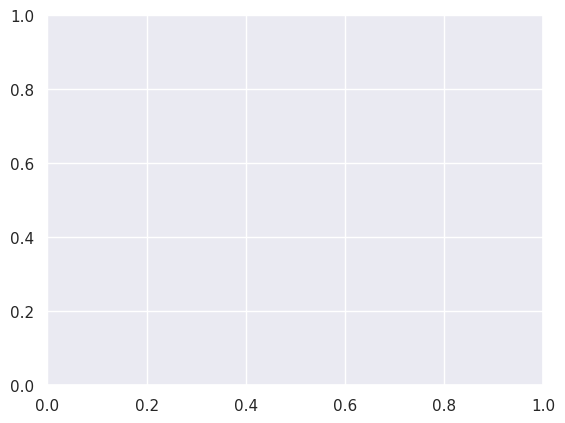

In [172]:
# Filter the dataframe to include only rows where Experience is less than 0
negative_experience = df[df['Abs_Experience'] < 0]

# Create a countplot
sns.countplot(x=negative_experience['Abs_Experience'], order=negative_experience['Abs_Experience'].value_counts().index)

# Show the plot
plt.show()

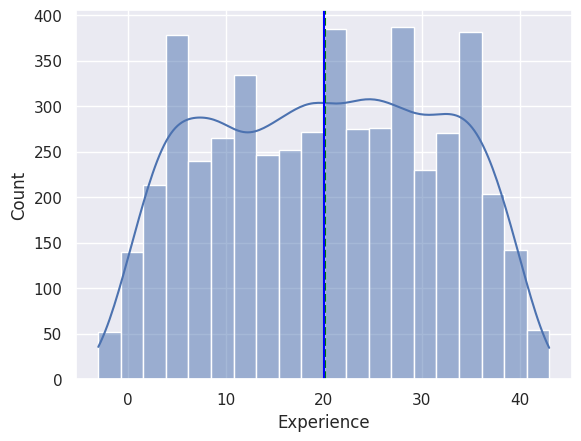

In [173]:
ax = sns.histplot(df.Experience, kde=True)
ax.axvline(np.mean(df.Experience), color='green', linestyle='--')
ax.axvline(np.median(df.Experience), color='blue', linestyle='-')
plt.show()

- No more negative values.
- The change also not changed the distribution curve.

### Observation on ZIPCode

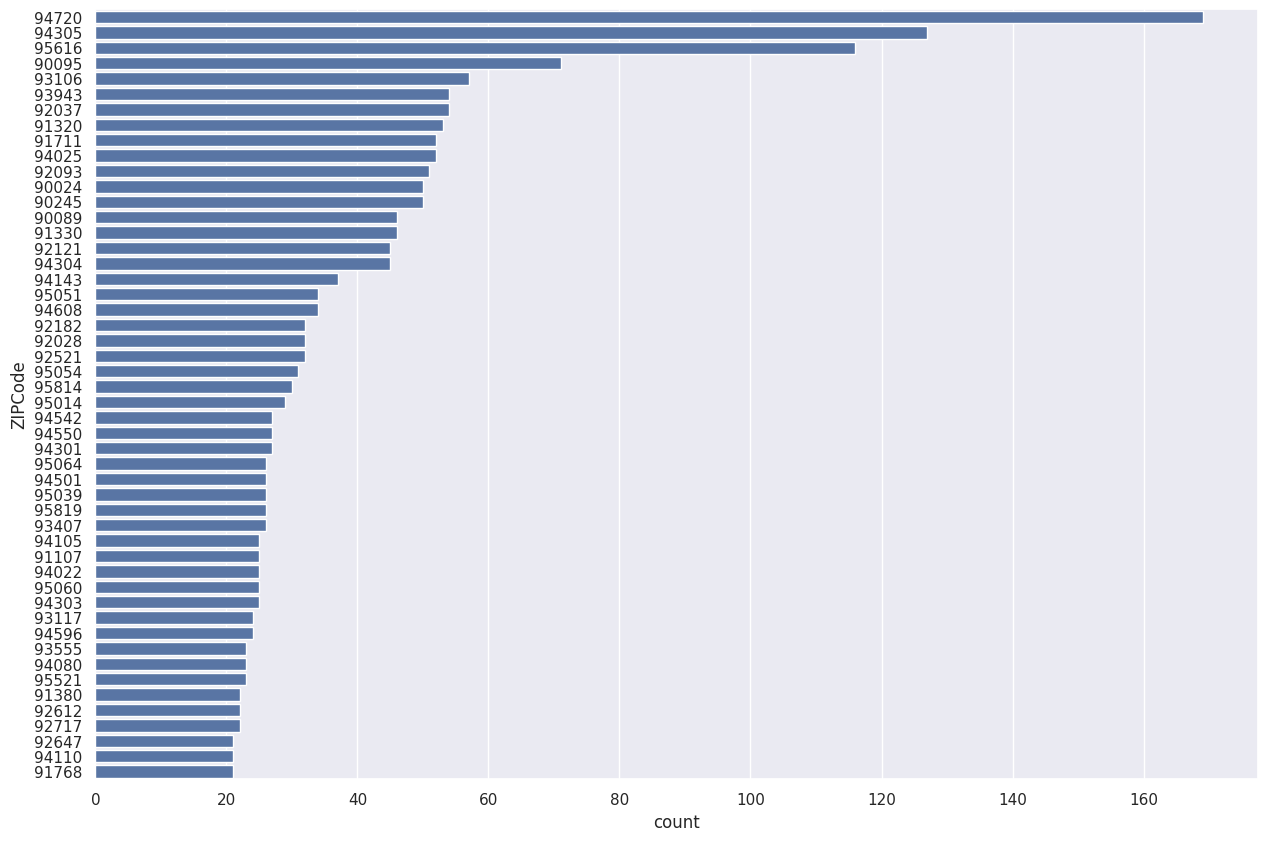

In [174]:
plt.figure(figsize=(15, 10))
sns.countplot(y="ZIPCode", data=df, order=df.ZIPCode.value_counts().index[0:50]);

- 94720 ZIPCode has more number of data (more than 160+)

In [175]:
def annotate_percentage_on_bar(plot, feature):
    """
    This function annotates the percentage of each bar in a bar plot.
    feature: categorical feature
    Note: This function won't work if a column is passed in hue parameter.
    """
    # Calculate the total number of instances for the percentage calculation
    total = len(feature)

    # Loop over each bar in the plot
    for bar in plot.patches:
        # Calculate the percentage of each class of the category
        percentage = 100 * bar.get_height() / total
        # Format the percentage to a string
        percentage_label = f"{percentage:.1f}%"

        # Calculate the center x-coordinate of the bar for the annotation
        x = bar.get_x() + bar.get_width() / 2 - 0.05
        # Calculate the y-coordinate of the bar for the annotation
        y = bar.get_y() + bar.get_height()

        # Annotate the percentage on the bar
        plot.annotate(percentage_label, (x, y), size=12)

    # Display the plot
    plt.show()


### Observations on Family.

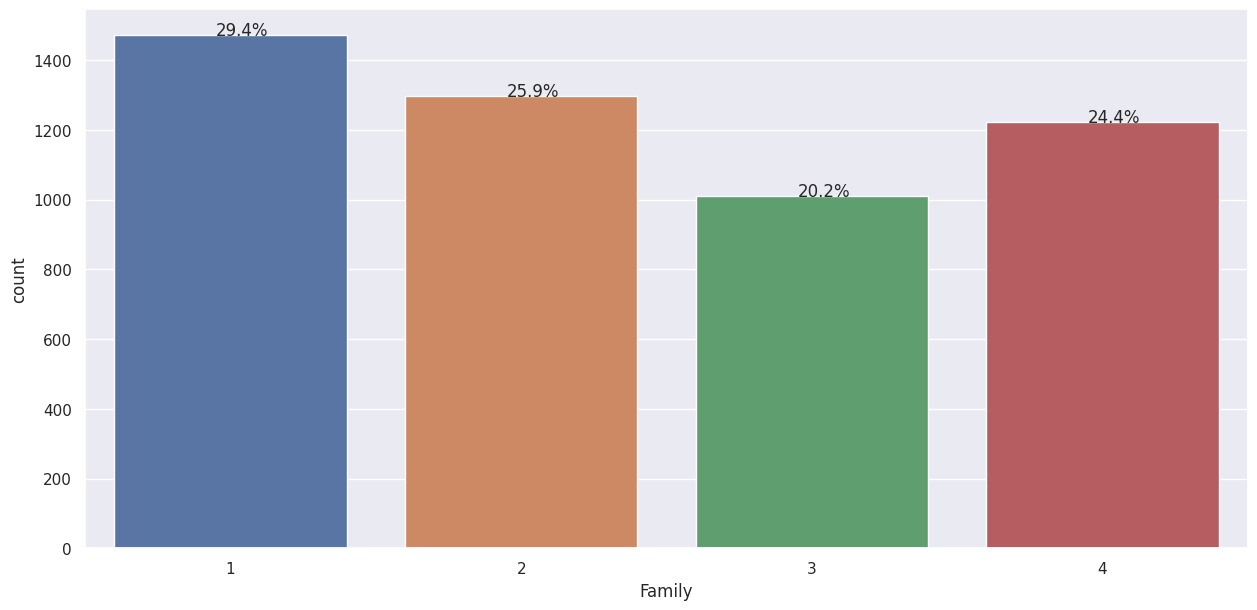

In [176]:
# Create a new figure with a specified size of 15x7
plt.figure(figsize=(15, 7))

# Create a countplot for the 'Family' column in the dataframe 'df', using a deep color palette
ax = sns.countplot(x=df.Family, palette="deep")

# Annotate the percentage on each bar in the countplot
annotate_percentage_on_bar(ax, df.Family)


- In the family column, the category with the most representation is 1, accounting for 29.4% of the data.
- The next most common category is a family size of 2, followed by 4.
- The least represented category in our dataset is a family size of 3.

### Observations on Education.

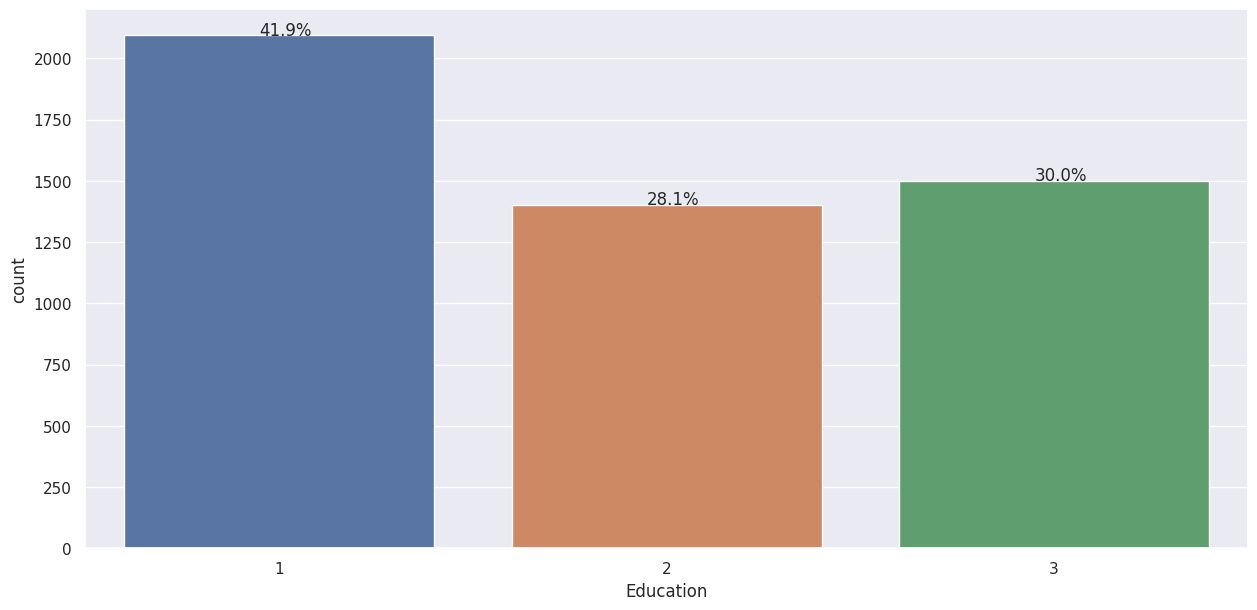

In [177]:
# Create a new figure with a specified size of 15x7
plt.figure(figsize=(15, 7))

# Create a countplot for the 'Education' column in the dataframe 'df', using a deep color palette
ax = sns.countplot(x=df.Education, palette="deep")

# Annotate the percentage on each bar in the countplot
annotate_percentage_on_bar(ax, df.Education)


- The education column is divided into three categories.
- The most prevalent category is Category 1, which constitutes 41.9% of the data.
- This is followed by Category 3, which makes up 30% of the data.
- Category 2 is the third, accounting for 28.1% of the data.

### Observation on Personal_Loan.

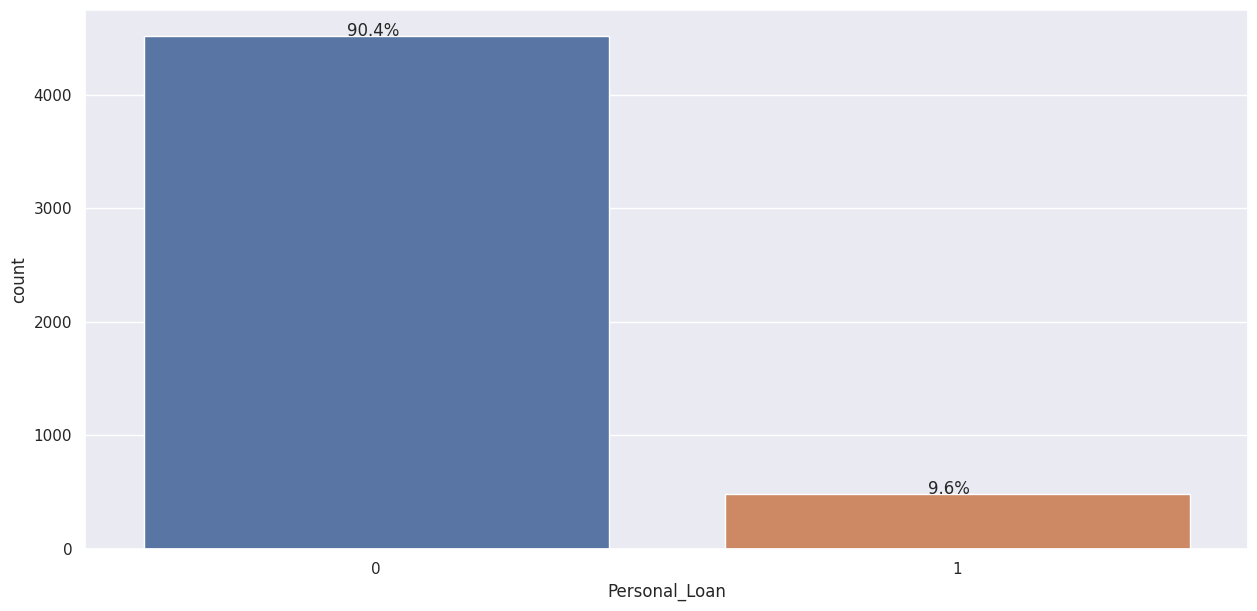

In [178]:
# Create a new figure with a specified size of 15x7
plt.figure(figsize=(15, 7))

# Create a countplot for the 'Personal_Loan' column in the dataframe 'df', using a deep color palette
ax = sns.countplot(x=df.Personal_Loan, palette="deep")

# Annotate the percentage on each bar in the countplot
annotate_percentage_on_bar(ax, df.Personal_Loan)


- Personal_Loan 0 represents the individuals who have not taken a personal loan, accounting for 90.4% of the data.

### Observation on Securities_Account

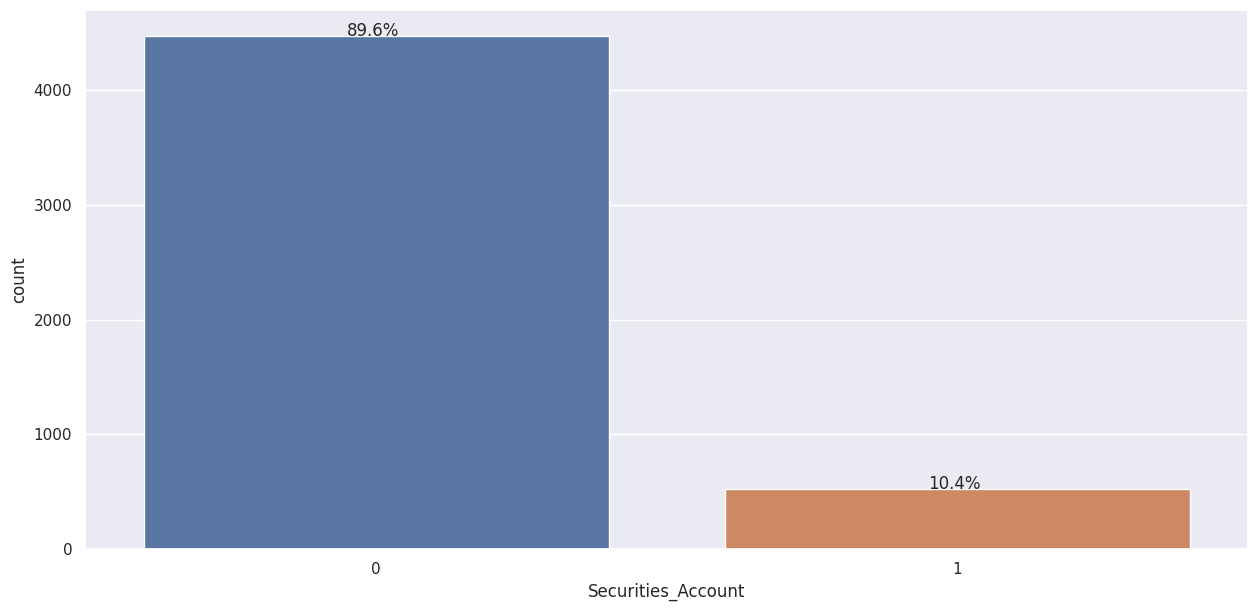

In [179]:
# Create a new figure with a specified size of 15x7
plt.figure(figsize=(15, 7))

# Create a countplot for the 'Personal_Loan' column in the dataframe 'df', using a deep color palette
ax = sns.countplot(x=df.Securities_Account, palette="deep")

# Annotate the percentage on each bar in the countplot
annotate_percentage_on_bar(ax, df.Securities_Account)

- The largest proportion of customers, at 89.6%, do not have a securities account.

### Observations on CD_Account

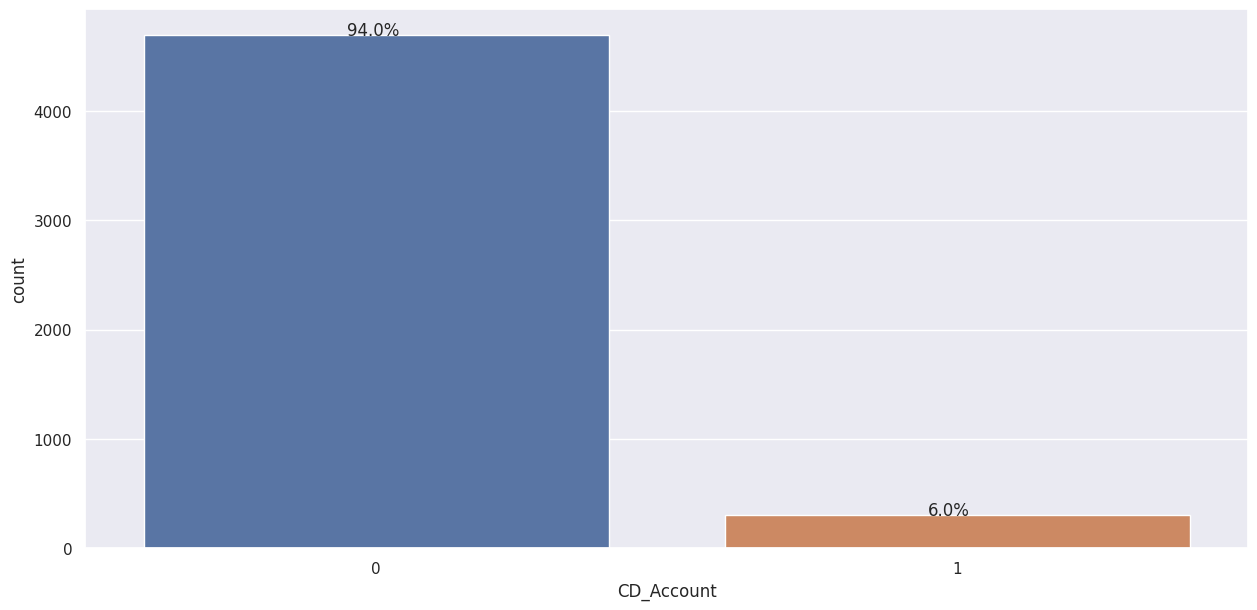

In [180]:
# Create a new figure with a specified size of 15x7
plt.figure(figsize=(15, 7))

# Create a countplot for the 'CD_Account' column in the dataframe 'df', using a deep color palette
ax = sns.countplot(x=df.CD_Account, palette="deep")

# Annotate the percentage on each bar in the countplot
annotate_percentage_on_bar(ax, df.CD_Account)

- Customers with out CD_Account is 94%.

### Observations on Online.

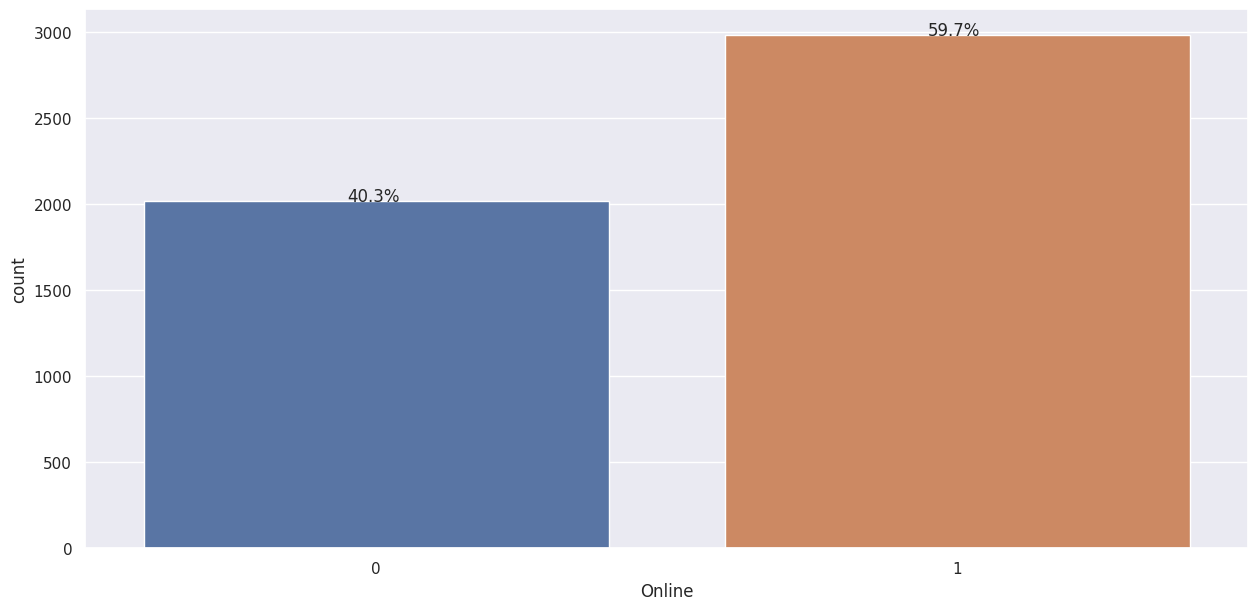

In [181]:
# Create a new figure with a specified size of 15x7
plt.figure(figsize=(15, 7))

# Create a countplot for the 'Online' column in the dataframe 'df', using a deep color palette
ax = sns.countplot(x=df.Online, palette="deep")

# Annotate the percentage on each bar in the countplot
annotate_percentage_on_bar(ax, df.Online)

- Customers use Online banking is 59.7%.

### Observation on CreditCard.

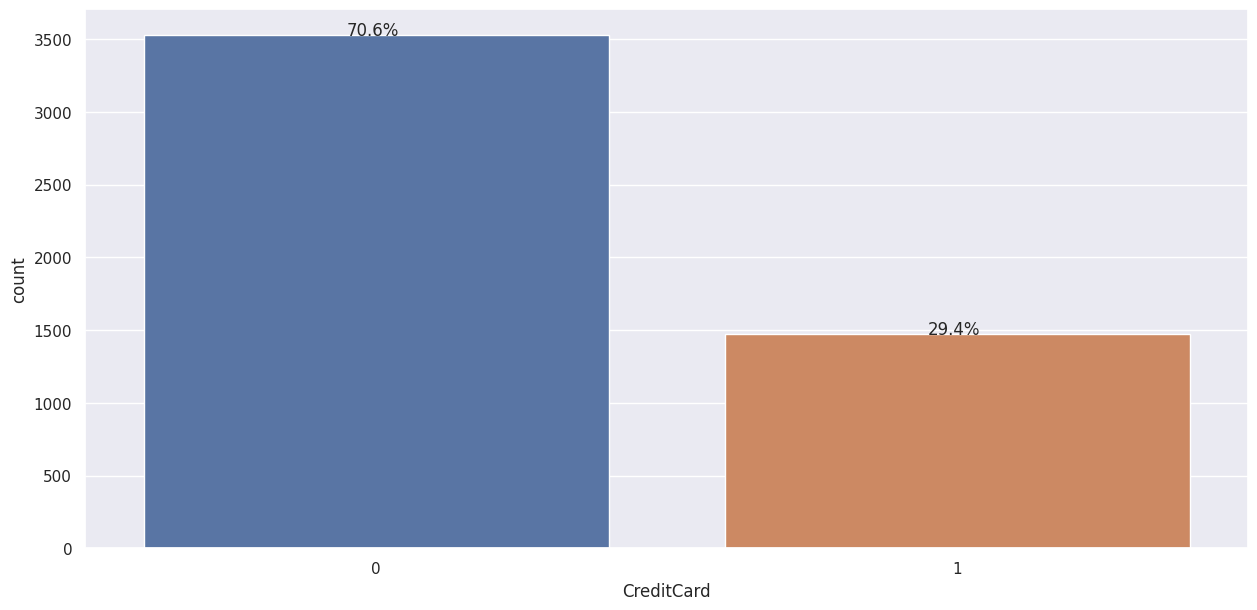

In [182]:
# Create a new figure with a specified size of 15x7
plt.figure(figsize=(15, 7))

# Create a countplot for the 'CreditCard' column in the dataframe 'df', using a deep color palette
ax = sns.countplot(x=df.CreditCard, palette="deep")

# Annotate the percentage on each bar in the countplot
annotate_percentage_on_bar(ax, df.CreditCard)

- Customers not having Credit Card is 70.6%

### Distributions of numerical columns

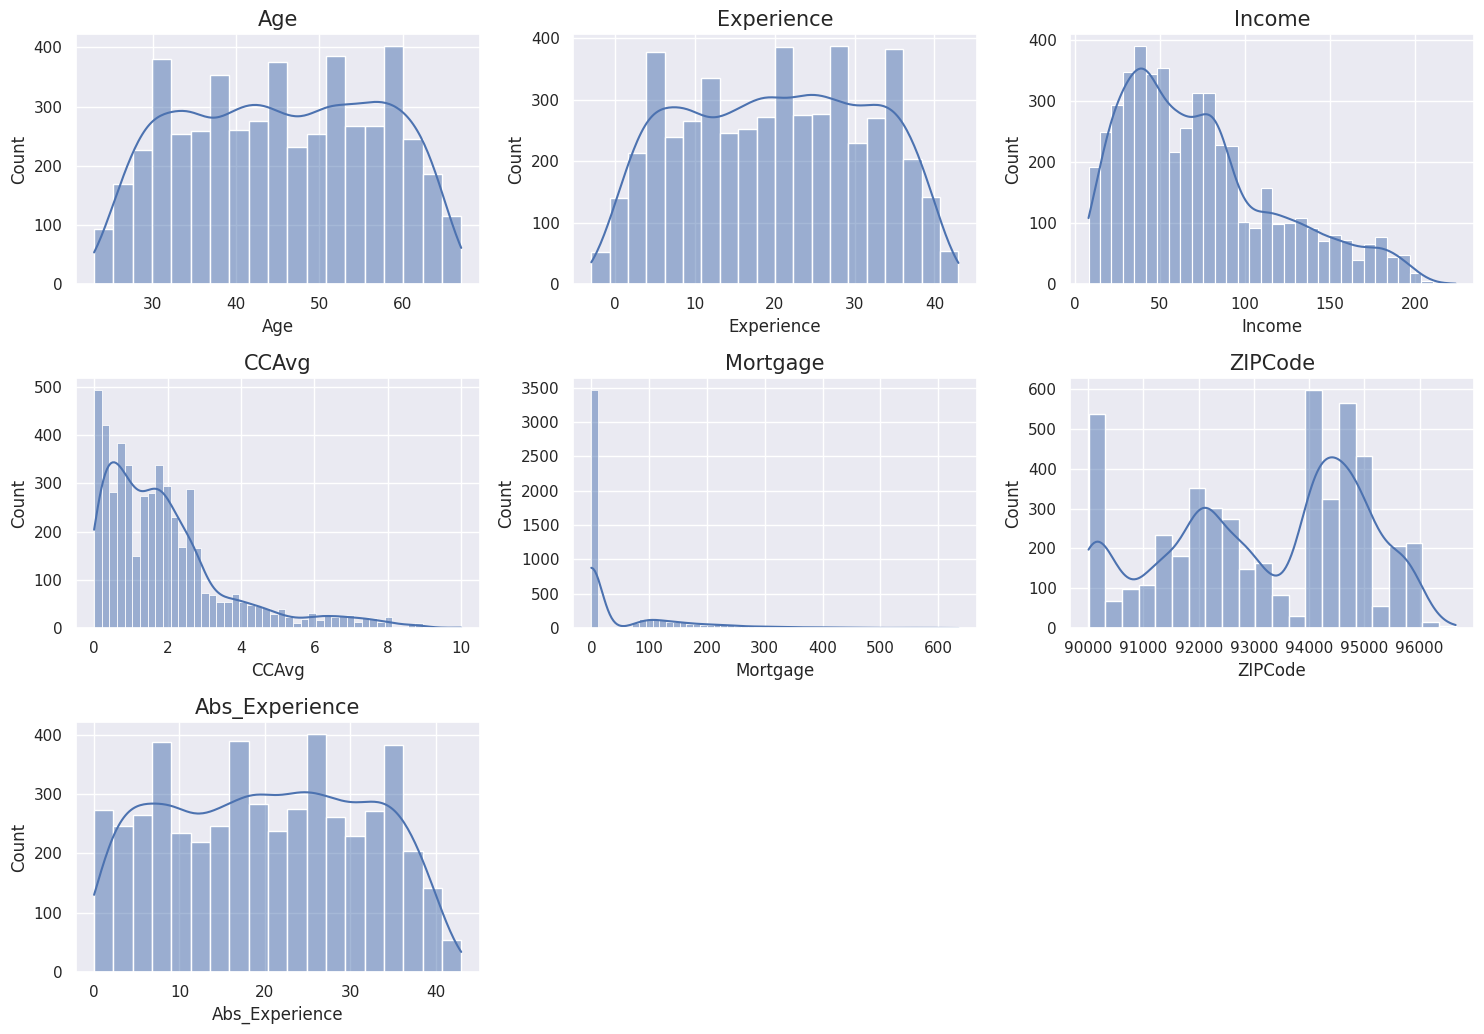

In [183]:
# List of features to plot
features = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'ZIPCode', 'Abs_Experience']

# Calculate the number of rows needed for the subplot grid
n_rows = math.ceil(len(features) / 3)

# Create a figure with the appropriate size
plt.figure(figsize=(15, n_rows * 3.5))

# Loop over each feature
for i, feature in enumerate(features):
    # Create a subplot for each feature
    plt.subplot(n_rows, 3, i + 1)

    # Plot a histogram of the feature
    sns.histplot(df[feature], kde=True)

    # Adjust the layout to prevent overlapping
    plt.tight_layout()

    # Set the title of the subplot
    plt.title(feature, fontsize=15)

# Display the plot
plt.show()


### Dispersion of numerical columns



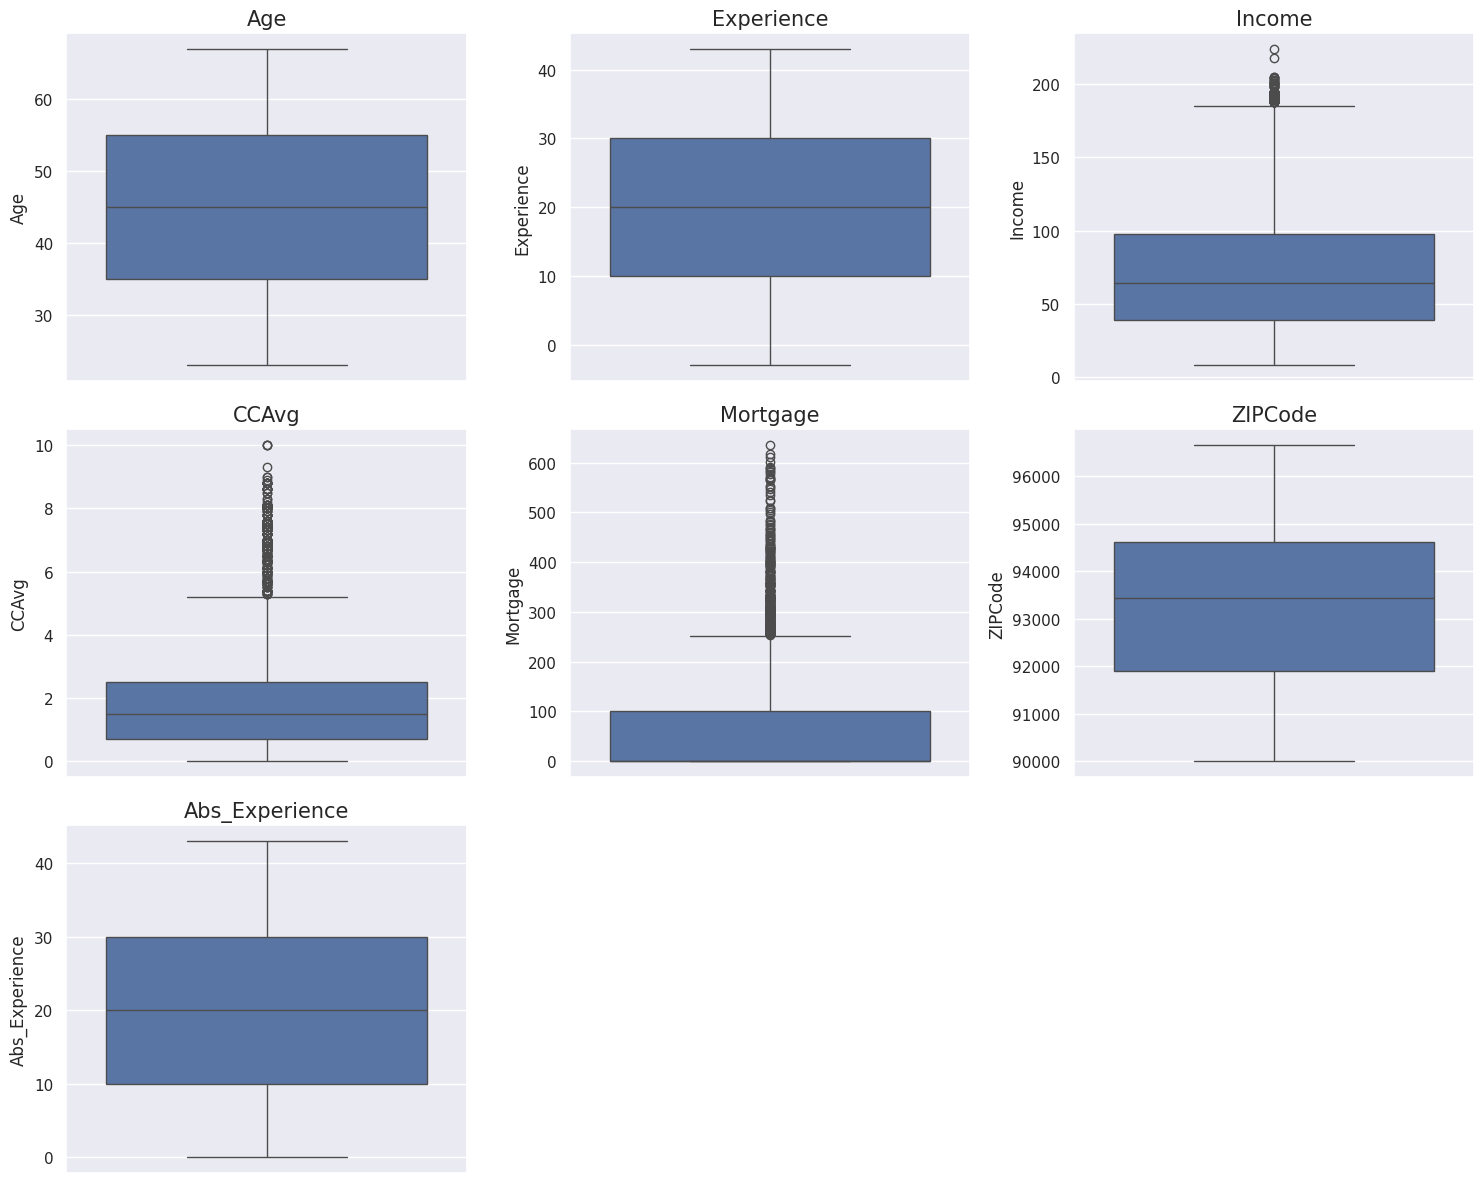

In [184]:
# List of features to plot
features = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'ZIPCode', 'Abs_Experience']

# Calculate the number of rows needed for the subplot grid
n_rows = math.ceil(len(features) / 3)

# Create a figure with the appropriate size
plt.figure(figsize=(15, n_rows * 4))

# Loop over each feature
for i, feature in enumerate(features):
    # Create a subplot for each feature
    plt.subplot(n_rows, 3, i + 1)

    # Plot a boxplot of the feature using seaborn
    # The 'whis' parameter is set to 1.5 to define the threshold for outliers
    sns.boxplot(df[feature], whis=1.5)

    # Set the title of the subplot
    plt.title(feature, fontsize=15)

# Adjust the layout to prevent overlapping and display the plot
plt.tight_layout()
plt.show()


### Display Categorical Columns.

In [185]:
# Define the maximum number of unique values to display for each feature
# This is defined at the top for easy modification later if needed
num_to_display = 10

# Loop over each column in the dataframe where the data type is 'category'
for colname in df.dtypes[df.dtypes == 'category'].index:
    # Get the value counts for the current column, including NA values
    val_counts = df[colname].value_counts(dropna=False)

    # Print the column name
    print(f"Column: {colname}")

    # Print a separator for readability
    print("-" * 40)

    # Print the top 'num_to_display' value counts for the current column
    print(val_counts[:num_to_display])

    # If there are more unique values than 'num_to_display', print a message indicating this
    if len(val_counts) > num_to_display:
        print(f"Only displaying first {num_to_display} of {len(val_counts)} values.")

    # Print a newline for spacing between columns
    print("\n")


Column: Family
----------------------------------------
Family
1    1472
2    1296
4    1222
3    1010
Name: count, dtype: int64


Column: Education
----------------------------------------
Education
1    2096
3    1501
2    1403
Name: count, dtype: int64




<span style="font-family: Helvetica; font-weight:bold;font-size:2.5em;color:navy">Bivariant Analysis</span>

### Correlation and heatmap

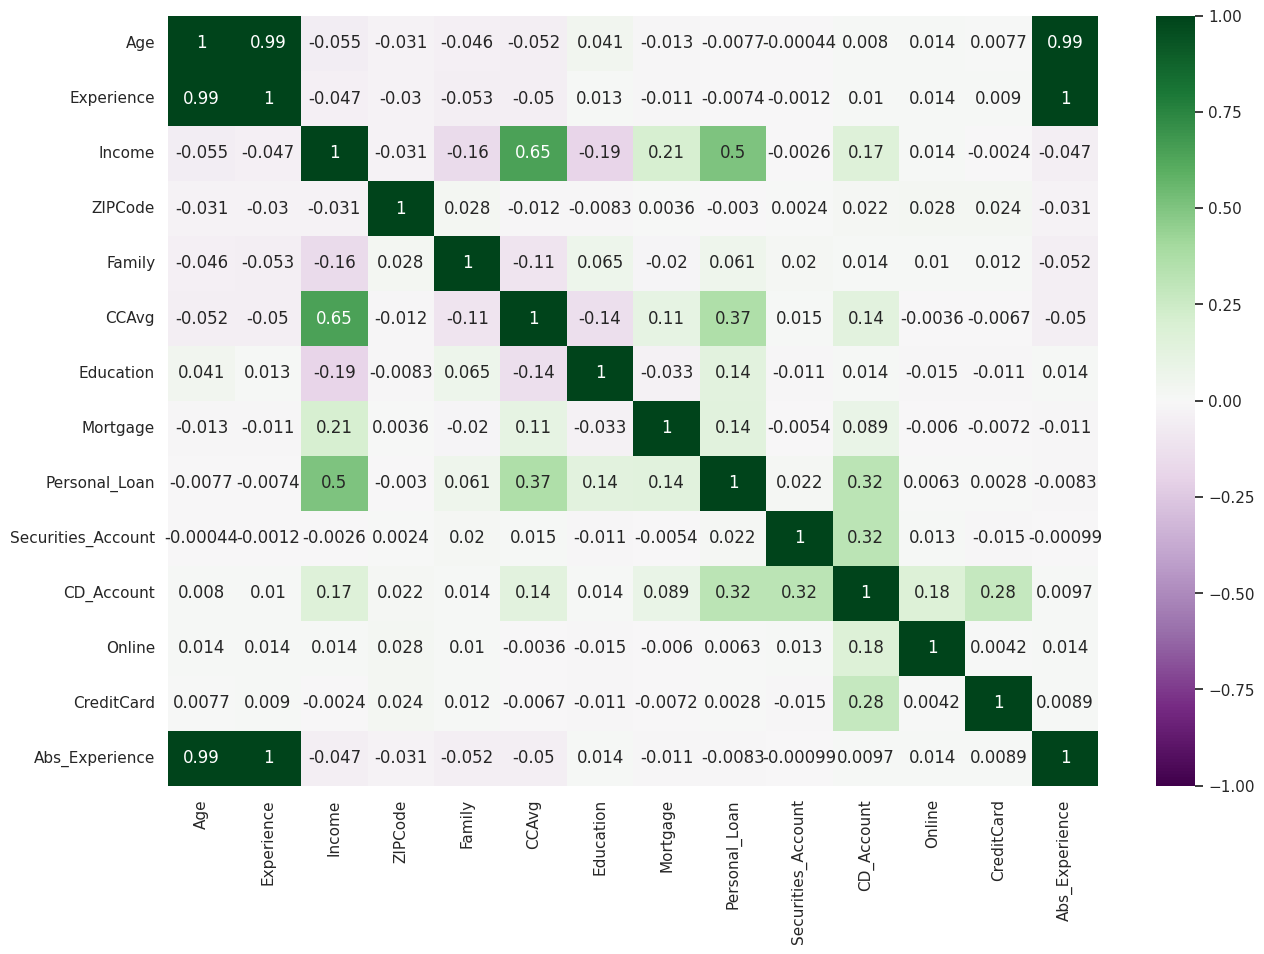

In [186]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='PRGn', vmin=-1, vmax=1)
plt.show()

- There is a strong positive correlation between age and experience.
- There is a positive correlation between credit card average (ccavg) and income.
- Income and personal loan share a moderate positive correlation of 50%.

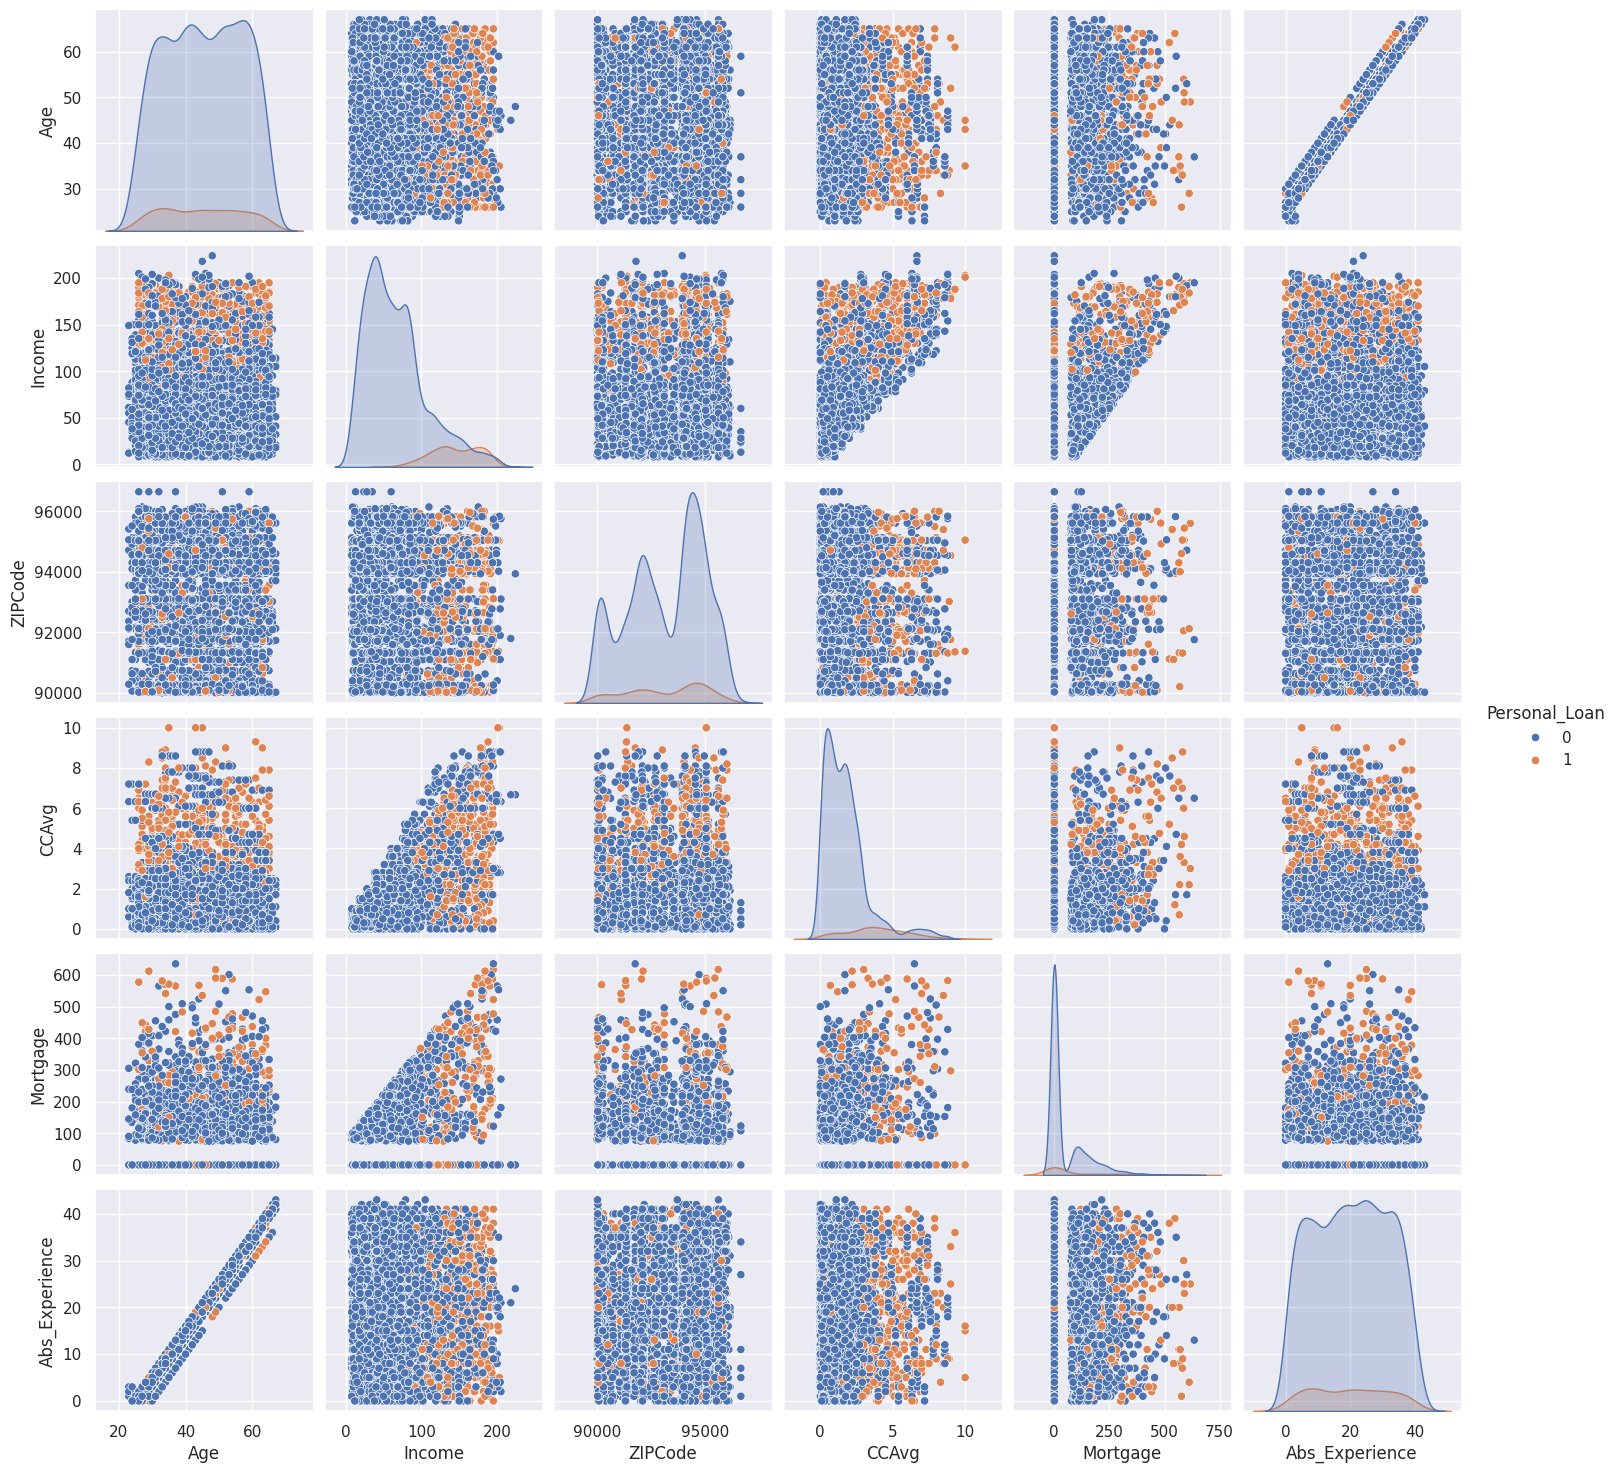

In [187]:
sns.pairplot(data=df[['Age','Income','ZIPCode','CCAvg',
                      'Mortgage','Abs_Experience','Personal_Loan']],
             hue='Personal_Loan');

- The graph indicates a higher income for customers who have personal loans.
- The average credit card spending (ccavg) is also observed to be greater among these customers.
- We will conduct further analysis to understand this trend.

In [188]:
def display_boxplots(columns: list, target: str, show_outliers=True, dataset=df):
    # Calculate the number of rows for the subplot grid
    num_rows = math.ceil(len(columns)/2)

    # Create a figure with appropriate size based on the number of rows
    plt.figure(figsize=(15, num_rows*5))

    # Loop through each variable in the columns list
    for index, column in enumerate(columns):
        # Create a subplot for each variable
        plt.subplot(num_rows, 2, index+1)

        # Check if outliers should be displayed
        if show_outliers:
            # Create a boxplot with outliers
            sns.boxplot(x=dataset[target], y=dataset[column], palette="BuGn_r", showfliers=True)
        else:
            # Create a boxplot without outliers
            sns.boxplot(x=dataset[target], y=dataset[column], palette="Set2", showfliers=False)

        # Adjust the layout to prevent overlap
        plt.tight_layout()

        # Set the title of the subplot
        plt.title(column, fontsize=12)

    # Display the figure with all subplots
    plt.show()

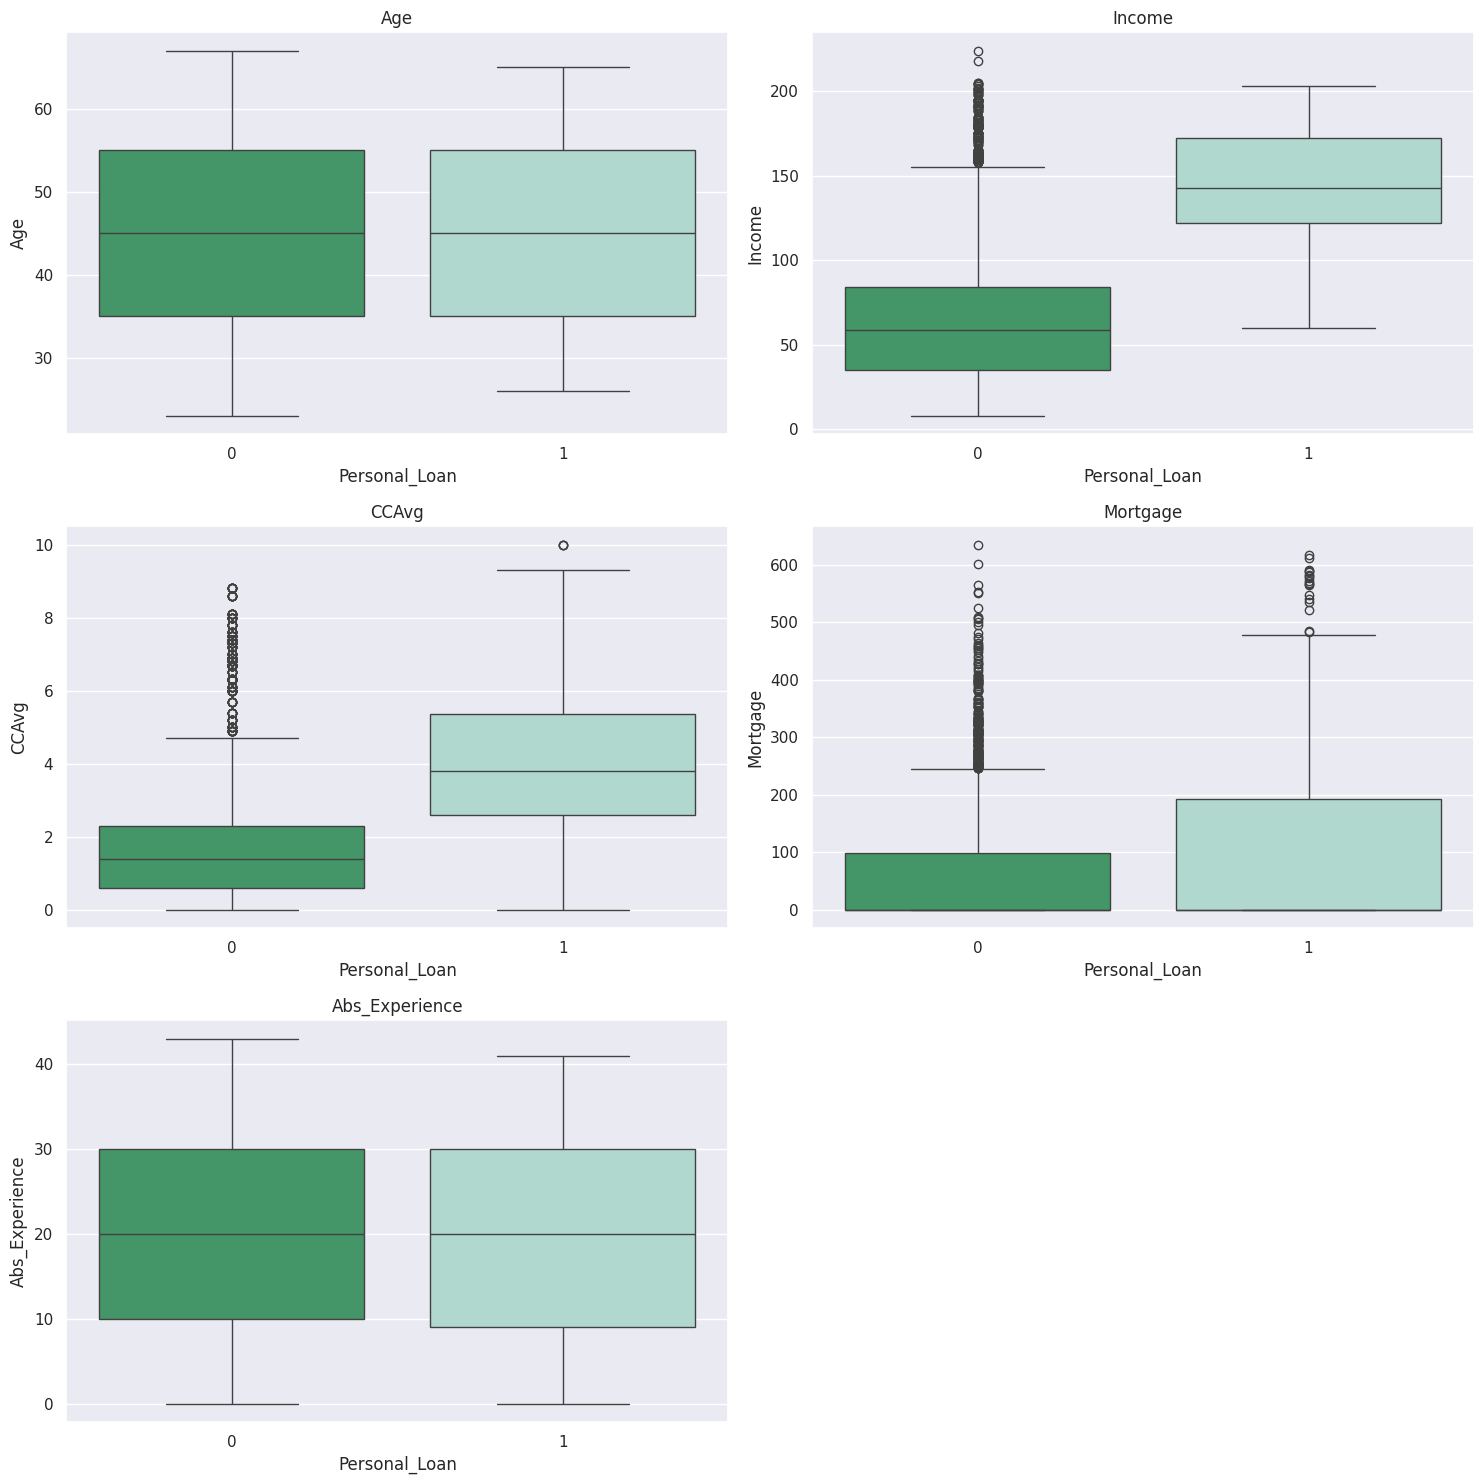

In [189]:
cols = ['Age','Income','CCAvg','Mortgage','Abs_Experience']
display_boxplots(cols, 'Personal_Loan')

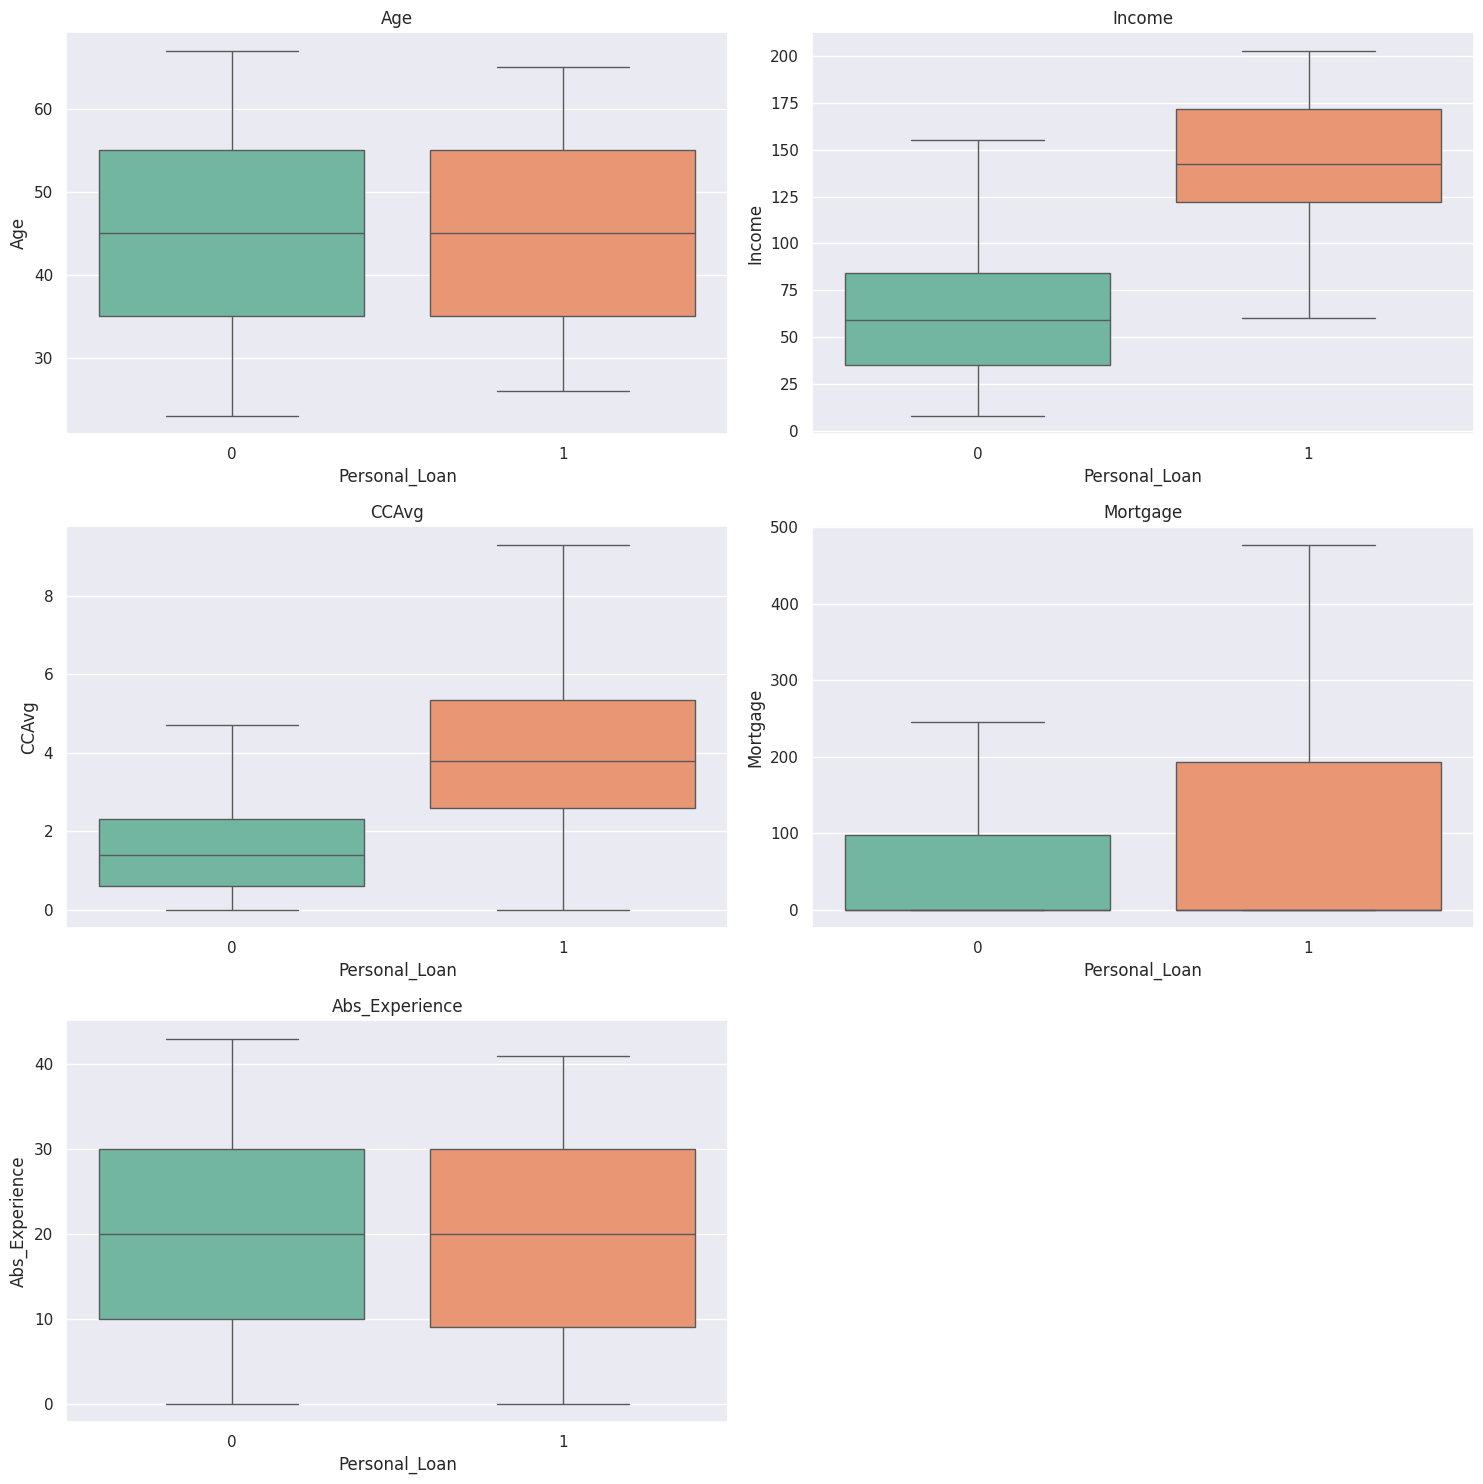

In [190]:
# show box plot with out outliers.
display_boxplots(cols, 'Personal_Loan', show_outliers=False);

- Customers with personal loans tend to have higher incomes on average.
- It is observed that customers with personal loans, on average, have higher credit card usage.
- Three-quarters of customers with personal loans make mortgage payments of 500K or less.

In [191]:
def stacked_plot(x, y):
    """
    This function creates a stacked bar plot from two pandas data series.

    Parameters:
    x: pandas data series
    y: pandas data series
    """
    # Create a cross-tabulation of two (or more) factors. By default computes a frequency table of the factors.
    info = pd.crosstab(x, y, margins=True)

    # Calculate the percentage of 0s and add it as a new column in the dataframe
    info['% - 0'] = round(info[0]/info['All']*100, 2)

    # Calculate the percentage of 1s and add it as a new column in the dataframe
    info['% - 1'] = round(info[1]/info['All']*100, 2)

    # Print the dataframe
    print(info)

    # Print a separator for better visualization
    print('='*80)

    # Create a normalized cross-tabulation and store it in 'visual'
    visual = pd.crosstab(x, y, normalize='index')

    # Plot the data in 'visual' as a stacked bar chart
    visual.plot(kind='bar', stacked=True, figsize=(10,5))


## Personal_Loan vs Family

Personal_Loan     0    1   All  % - 0  % - 1
Family                                      
1              1365  107  1472  92.73   7.27
2              1190  106  1296  91.82   8.18
3               877  133  1010  86.83  13.17
4              1088  134  1222  89.03  10.97
All            4520  480  5000  90.40   9.60


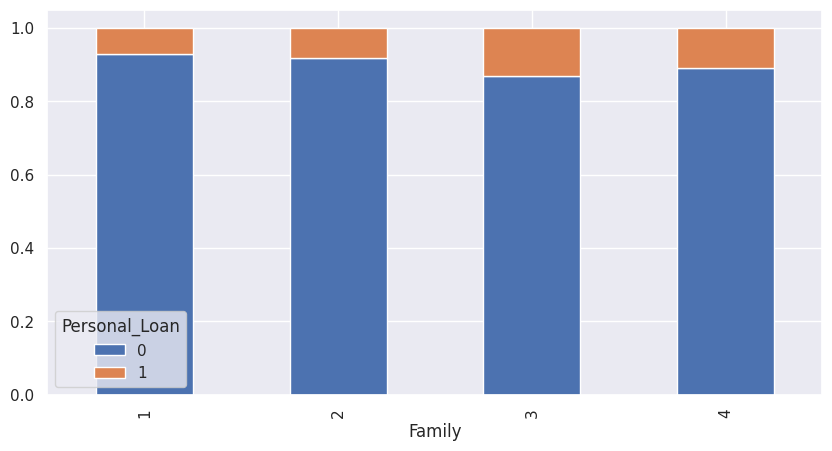

In [192]:
stacked_plot(df.Family, df.Personal_Loan)

- Customers with a family size of 4 hold the highest number of personal loans.
- This is followed by families of 3, while families of 1 and 2 have the least number of personal loans.

## Personal_Loan vs Eduation

Personal_Loan     0    1   All  % - 0  % - 1
Education                                   
1              2003   93  2096  95.56   4.44
2              1221  182  1403  87.03  12.97
3              1296  205  1501  86.34  13.66
All            4520  480  5000  90.40   9.60


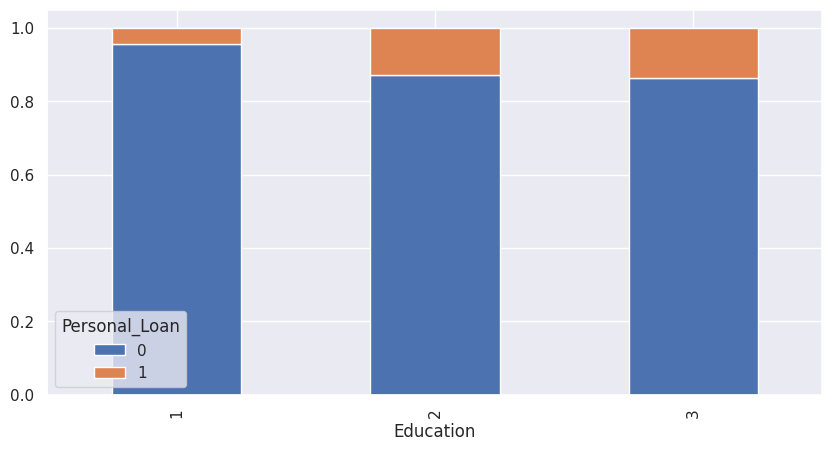

In [193]:
stacked_plot(df.Education, df.Personal_Loan)

- Customers with an education level of ‘2’ and ‘3’ have a higher proportion of personal loans compared to those with an education level of ‘1’.

## Personal_Loan vs Securities_Account

Personal_Loan          0    1   All  % - 0  % - 1
Securities_Account                               
0                   4058  420  4478  90.62   9.38
1                    462   60   522  88.51  11.49
All                 4520  480  5000  90.40   9.60


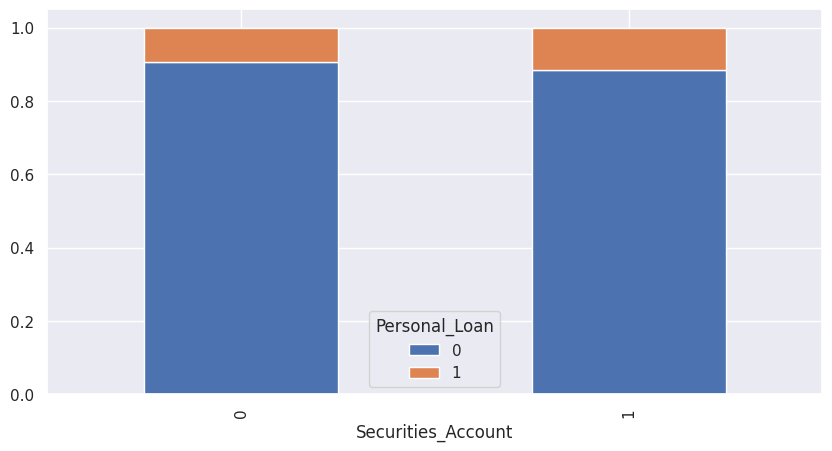

In [194]:
stacked_plot(df.Securities_Account, df.Personal_Loan)

- The disparity between securities accounts and personal loans is minimal.

## Personal_Loan vs CD_Account

Personal_Loan     0    1   All  % - 0  % - 1
CD_Account                                  
0              4358  340  4698  92.76   7.24
1               162  140   302  53.64  46.36
All            4520  480  5000  90.40   9.60


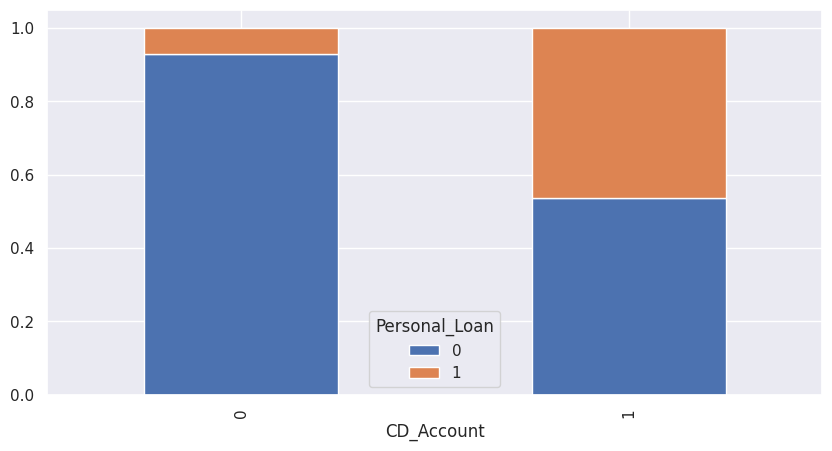

In [195]:
stacked_plot(df.CD_Account, df.Personal_Loan)

- Customers who have certificate of deposit (CD) accounts hold a higher percentage of personal loans compared to those who do not have a CD account.

## Personal_Loan vs Online

Personal_Loan     0    1   All  % - 0  % - 1
Online                                      
0              1827  189  2016  90.62   9.38
1              2693  291  2984  90.25   9.75
All            4520  480  5000  90.40   9.60


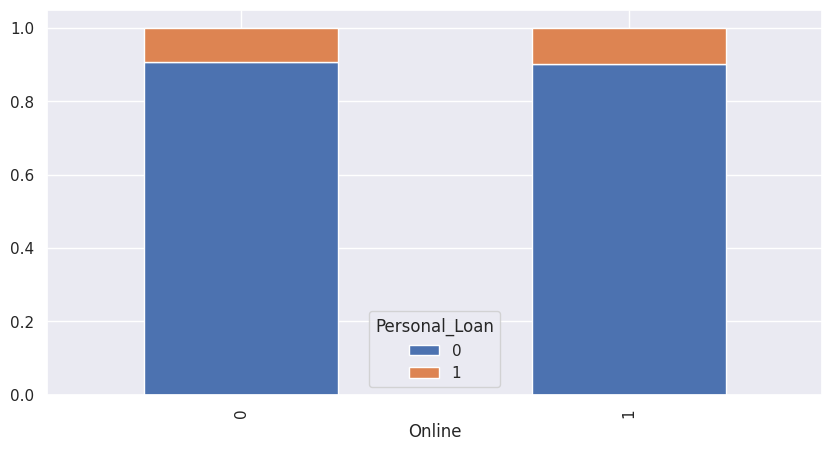

In [196]:
stacked_plot(df.Online, df.Personal_Loan)

- The presence or absence of online facilities does not significantly affect the proportion of personal loans among customers

## Personal_Loan vs Credit_Card

Personal_Loan     0    1   All  % - 0  % - 1
CreditCard                                  
0              3193  337  3530  90.45   9.55
1              1327  143  1470  90.27   9.73
All            4520  480  5000  90.40   9.60


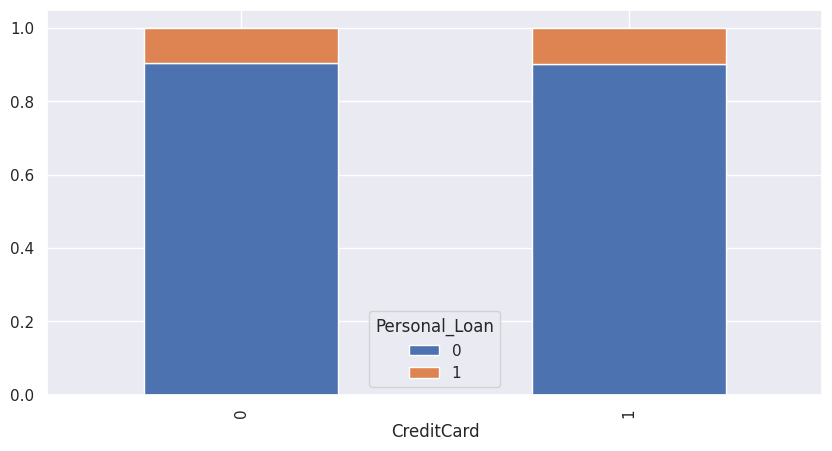

In [197]:
stacked_plot(df.CreditCard, df.Personal_Loan)

- The distinction between customers who have credit cards and their personal loans is not significant.

## CD_Account vs Family

CD_Account     0    1   All  % - 0  % - 1
Family                                   
1           1389   83  1472  94.36   5.64
2           1229   67  1296  94.83   5.17
3            928   82  1010  91.88   8.12
4           1152   70  1222  94.27   5.73
All         4698  302  5000  93.96   6.04


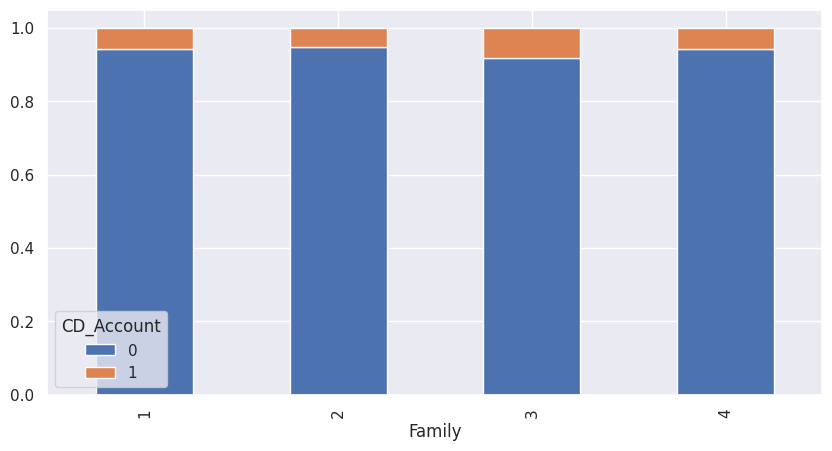

In [198]:
stacked_plot(df.Family, df.CD_Account)

- Families of three have the highest proportion, at 8.12%, of customers with certificate of deposit (CD) accounts.

## CD_Account vs Education

CD_Account     0    1   All  % - 0  % - 1
Education                                
1           1978  118  2096  94.37   5.63
2           1315   88  1403  93.73   6.27
3           1405   96  1501  93.60   6.40
All         4698  302  5000  93.96   6.04


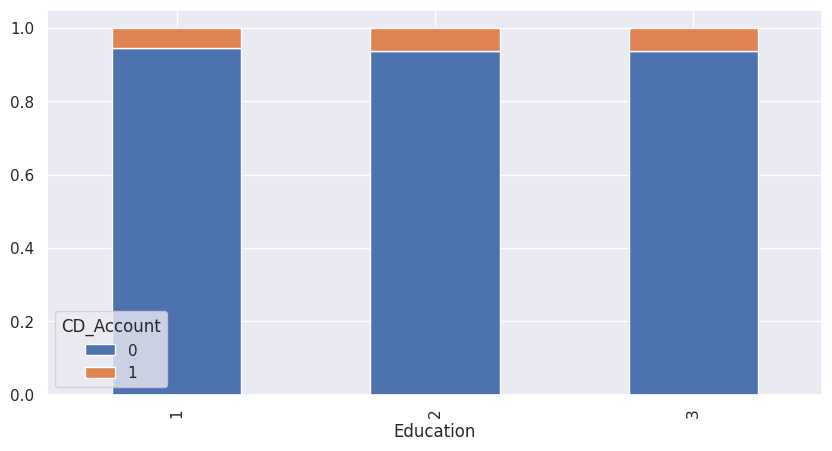

In [199]:
stacked_plot(df.Education, df.CD_Account)

- The differences among various education categories are not substantial.

## CD_Account vs Securities_Account

CD_Account             0    1   All  % - 0  % - 1
Securities_Account                               
0                   4323  155  4478  96.54   3.46
1                    375  147   522  71.84  28.16
All                 4698  302  5000  93.96   6.04


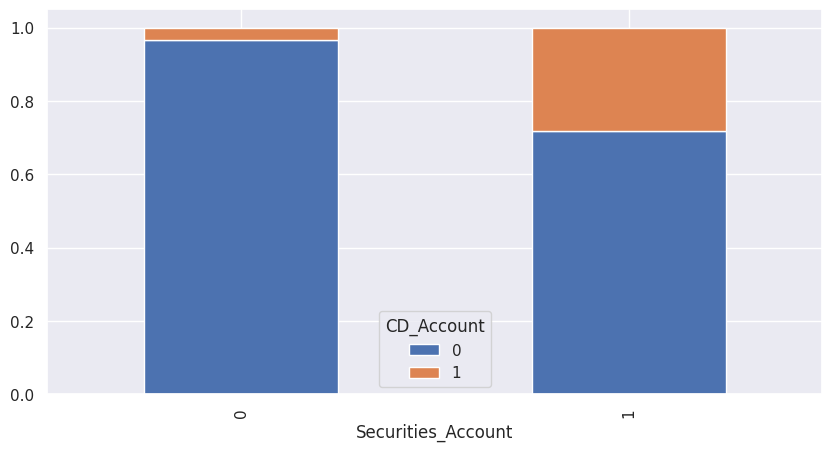

In [200]:
stacked_plot(df.Securities_Account, df.CD_Account)

- Customers with security accounts have a higher percentage of certificate of deposit (CD) accounts compared to those who do not have security accounts.

## CD_Account vs Online

CD_Account     0    1   All  % - 0  % - 1
Online                                   
0           1997   19  2016  99.06   0.94
1           2701  283  2984  90.52   9.48
All         4698  302  5000  93.96   6.04


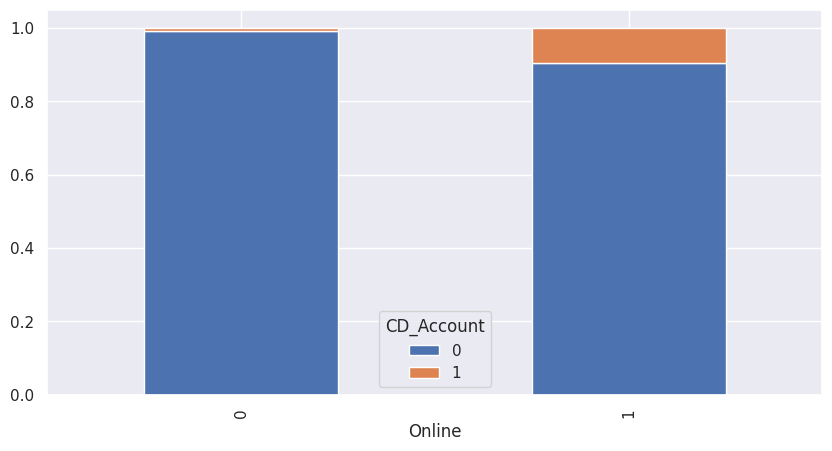

In [201]:
stacked_plot(df.Online, df.CD_Account)

- Customers utilizing online facilities have a higher proportion of certificate of deposit (CD) accounts compared to those who do not use online services.

## CD_Account vs Credit_Card

CD_Account     0    1   All  % - 0  % - 1
CreditCard                               
0           3468   62  3530  98.24   1.76
1           1230  240  1470  83.67  16.33
All         4698  302  5000  93.96   6.04


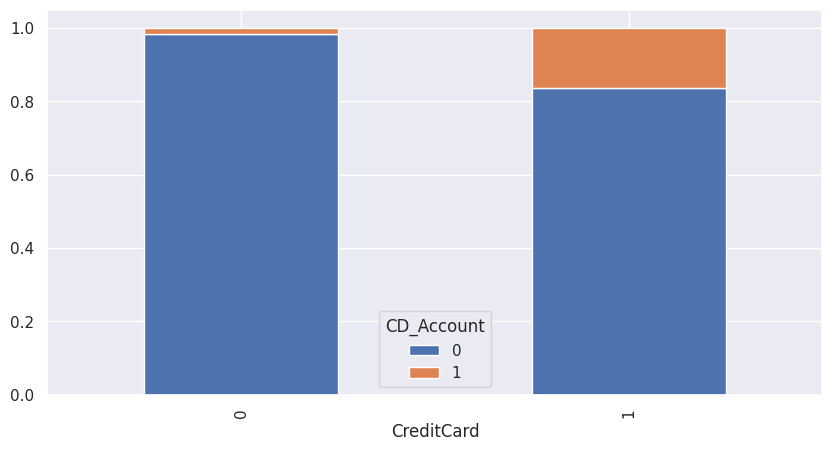

In [202]:
stacked_plot(df.CreditCard, df.CD_Account)

- Customers who have credit cards are more likely to have personal certificate of deposit (CD) accounts compared to those who do not have credit cards.

- The variables CD_Account, Family, and Education appear to be strong indicators of customers who have received a personal loan.
- On the other hand, Securities_Account, Online, and Credit_Card seem to be strong indicators of customers who have CD_Accounts.
- Other factors do not seem to be very effective indicators of customers that have CD_Accounts.

In [203]:
def check_significance(feature1: str, feature2: str, data=df):
    """
    This function checks the significance of 'feature1' against 'feature2' using a Chi-Square test.

    Parameters:
    feature1: str - The name of the first feature (column name in 'data')
    feature2: str - The name of the second feature (column name in 'data')
    data: pandas.DataFrame - The dataframe containing the features (defaults to 'df')
    """
    # Create a contingency table of 'feature1' and 'feature2'
    crosstab = pd.crosstab(data[feature1], data[feature2])

    # Perform a Chi-Square test of independence of variables in the contingency table
    chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

    # Define the Null Hypothesis
    Ho = f"{feature1} has no effect on {feature2}"

    # Define the Alternate Hypothesis
    Ha = f"{feature1} has an effect on {feature2}"

    # If the p-value is less than 0.05, we reject the Null Hypothesis
    if p_value < 0.05:
        print(f'{Ha.upper()} as the p_value ({p_value.round(3)}) < 0.05')
    else:
        print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

def show_significance(features: list, data=df):
    """
    This function prints out the significance of all the features in the list passed.

    Parameters:
    features: list - A list of feature names
    data: pandas.DataFrame - The dataframe containing the features (defaults to 'df')
    """
    # Iterate over each feature in the list
    for feature in features:
        print("="*30, feature, "="*(50-len(feature)))

        # For each column in 'data' that is not the current feature, check its significance
        for col in list(data.columns):
            if col != feature:
                check_significance(col , feature)

show_significance(['Personal_Loan', 'CD_Account'])


============================== Personal_Loan =====================================
Age has no effect on Personal_Loan as the p_value (0.12) > 0.05
Experience has no effect on Personal_Loan as the p_value (0.704) > 0.05
INCOME HAS AN EFFECT ON PERSONAL_LOAN as the p_value (0.0) < 0.05
ZIPCode has no effect on Personal_Loan as the p_value (0.76) > 0.05
FAMILY HAS AN EFFECT ON PERSONAL_LOAN as the p_value (0.0) < 0.05
CCAVG HAS AN EFFECT ON PERSONAL_LOAN as the p_value (0.0) < 0.05
EDUCATION HAS AN EFFECT ON PERSONAL_LOAN as the p_value (0.0) < 0.05
MORTGAGE HAS AN EFFECT ON PERSONAL_LOAN as the p_value (0.0) < 0.05
Securities_Account has no effect on Personal_Loan as the p_value (0.141) > 0.05
CD_ACCOUNT HAS AN EFFECT ON PERSONAL_LOAN as the p_value (0.0) < 0.05
Online has no effect on Personal_Loan as the p_value (0.693) > 0.05
CreditCard has no effect on Personal_Loan as the p_value (0.884) > 0.05
Abs_Experience has no effect on Personal_Loan as the p_value (0.805) > 0.05
=============

<span style="font-family: Helvetica; font-weight:bold;font-size:2.5em;color:navy">Data Preprocessing</span>

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [204]:
# drop the Experience column as Abs_Experience has the changed values.
try:
    df.drop('Experience', axis=1, inplace=True)
except:
    print("Experience column already dropped.")

df.head()

Age  Income  ZIPCode Family  CCAvg Education  Mortgage  Personal_Loan  \
0   25      49    91107      4    1.6         1         0              0   
1   45      34    90089      3    1.5         1         0              0   
2   39      11    94720      1    1.0         1         0              0   
3   35     100    94112      1    2.7         2         0              0   
4   35      45    91330      4    1.0         2         0              0   

   Securities_Account  CD_Account  Online  CreditCard  Abs_Experience  
0                   1           0       0           0               1  
1                   1           0       0           0              19  
2                   0           0       0           0              15  
3                   0           0       0           0               9  
4                   0           0       0           1               8

In [205]:
# This line of code converts categorical variable(s) into dummy/indicator variables.
# The 'columns' parameter specifies the column(s) to be converted.
# The 'drop_first' parameter is set to True, which means it will get k-1 dummies out of k categorical levels by removing the first level.
df_dummies = pd.get_dummies(df, columns=['Education', 'Family'], drop_first=True)

# Lists first 5 rows of the dataframe 'df_dummies'.
df_dummies.head()


Age  Income  ZIPCode  CCAvg  Mortgage  Personal_Loan  Securities_Account  \
0   25      49    91107    1.6         0              0                   1   
1   45      34    90089    1.5         0              0                   1   
2   39      11    94720    1.0         0              0                   0   
3   35     100    94112    2.7         0              0                   0   
4   35      45    91330    1.0         0              0                   0   

   CD_Account  Online  CreditCard  Abs_Experience  Education_2  Education_3  \
0           0       0           0               1        False        False   
1           0       0           0              19        False        False   
2           0       0           0              15        False        False   
3           0       0           0               9         True        False   
4           0       0           1               8         True        False   

   Family_2  Family_3  Family_4  
0     False     False      True  
1     False      True     False  
2     False     False     False  
3     False     False     False  
4     False     False      True

In [206]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Income              5000 non-null   int64  
 2   ZIPCode             5000 non-null   int64  
 3   CCAvg               5000 non-null   float64
 4   Mortgage            5000 non-null   int64  
 5   Personal_Loan       5000 non-null   int64  
 6   Securities_Account  5000 non-null   int64  
 7   CD_Account          5000 non-null   int64  
 8   Online              5000 non-null   int64  
 9   CreditCard          5000 non-null   int64  
 10  Abs_Experience      5000 non-null   int64  
 11  Education_2         5000 non-null   bool   
 12  Education_3         5000 non-null   bool   
 13  Family_2            5000 non-null   bool   
 14  Family_3            5000 non-null   bool   
 15  Family_4            5000 non-null   bool   
dtypes: boo

In [207]:
# Drop the Personal_Loan column as that's a dependent variable.

X = df_dummies.drop('Personal_Loan', axis=1)
X.head(10)

Age  Income  ZIPCode  CCAvg  Mortgage  Securities_Account  CD_Account  \
0   25      49    91107    1.6         0                   1           0   
1   45      34    90089    1.5         0                   1           0   
2   39      11    94720    1.0         0                   0           0   
3   35     100    94112    2.7         0                   0           0   
4   35      45    91330    1.0         0                   0           0   
5   37      29    92121    0.4       155                   0           0   
6   53      72    91711    1.5         0                   0           0   
7   50      22    93943    0.3         0                   0           0   
8   35      81    90089    0.6       104                   0           0   
9   34     180    93023    8.9         0                   0           0   

   Online  CreditCard  Abs_Experience  Education_2  Education_3  Family_2  \
0       0           0               1        False        False     False   
1       0           0              19        False        False     False   
2       0           0              15        False        False     False   
3       0           0               9         True        False     False   
4       0           1               8         True        False     False   
5       1           0              13         True        False     False   
6       1           0              27         True        False      True   
7       0           1              24        False         True     False   
8       1           0              10         True        False     False   
9       0           0               9        False         True     False   

   Family_3  Family_4  
0     False      True  
1      True     False  
2     False     False  
3     False     False  
4     False      True  
5     False      True  
6     False     False  
7     False     False  
8      True     False  
9     False     False

In [208]:
# Create another dataset with Personal_Loan alone.
y = df_dummies['Personal_Loan']
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    1
Name: Personal_Loan, dtype: int64

In [209]:
# Dividing the data into a training set and a test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print("The dimensions of X_train are: ", X_train.shape)
print("The dimensions of X_test are: ", X_test.shape)

The dimensions of X_train are:  (3500, 15)
The dimensions of X_test are:  (1500, 15)


<span style="font-family: Helvetica; font-weight:bold;font-size:2.5em;color:navy">Model Building</span>

## Build Decision Tree Model

- We are going to construct our model using the DecisionTreeClassifier function. The 'gini' criteria, which is the default, will be used for splitting.

- If the occurrence of class A is 10% and class B is 90%, class B becomes the prevalent class and the decision tree tends to be biased towards the prevalent classes.

- In such a scenario, we can provide a dictionary {0:0.15,1:0.85} to the model to denote the weight of each class, and the decision tree will assign more importance to class 1.

- The class_weight is a hyperparameter for the decision tree classifier.


In [210]:
model = DecisionTreeClassifier(criterion='gini',
                               class_weight={0:0.15, 1:0.85},
                               random_state=1)

In [211]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

In [212]:
## Function to construct a confusion matrix
def construct_confusion_matrix(model, y_actual, labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : actual values

    '''
    # Predicting the values of test data
    y_predict = model.predict(X_test)
    # Computing confusion matrix to evaluate the accuracy of a classification
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    # Creating a DataFrame of confusion matrix
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    # Formatting the values in confusion matrix
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    # Creating a heatmap of confusion matrix
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    # Setting the labels of x and y axis
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [213]:
## Function to compute recall score
def compute_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    # Predicting the values of training data
    pred_train = model.predict(X_train)
    # Predicting the values of test data
    pred_test = model.predict(X_test)
    # Printing the recall score on training set
    print("Recall score on training set : ",metrics.recall_score(y_train,pred_train))
    # Printing the recall score on test set
    print("Recall score on test set : ",metrics.recall_score(y_test,pred_test))


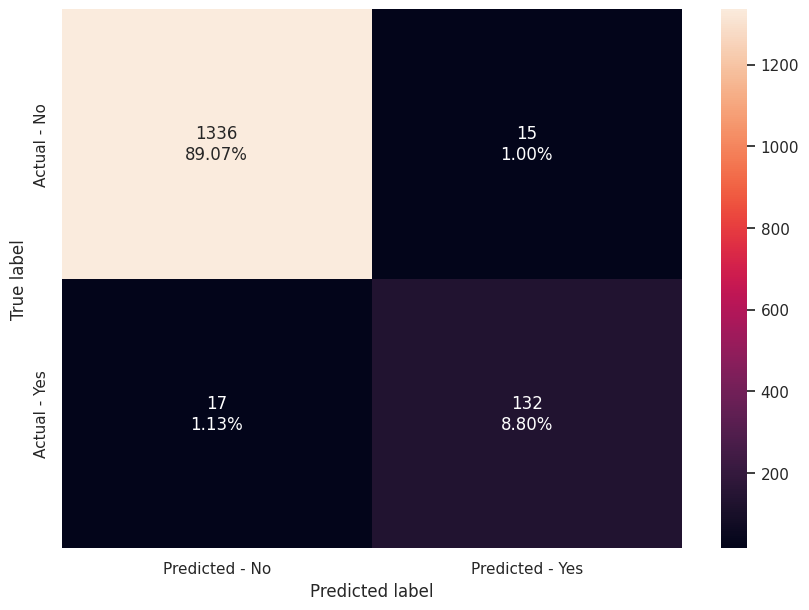

In [214]:
construct_confusion_matrix(model, y_test)

In [215]:
print("Accuracy on training set : ",model.score(X_train, y_train))
print("Accuracy on test set : ",model.score(X_test, y_test))

Accuracy on training set :  1.0
Accuracy on test set :  0.9786666666666667


### Model Evaluation Criterion

In [216]:
y_train.value_counts(normalize=True)

Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64

- The data shown indicates that the target variable Personal_Loan is imbalanced, with about 90.5% of the instances being 0 (loan not taken) and only about 9.5% being 1 (loan taken).
- In such cases, using accuracy as a metric can be misleading. Imagine a naive model that always predicts 0 (the majority class). This model would be correct 90.5% of the time, and thus have an accuracy of 90.5%.
- However, it would fail to identify any instances of class 1, which is likely the more important class in this context (we want to identify who would take a loan).
- Therefore, in situations with imbalanced classes, it’s often more informative to use other metrics such as Precision, Recall, F1 score, or Area Under the Receiver Operating Characteristic Curve (AUROC).
- These metrics can provide a better indication of model performance on the minority class.

In [217]:
compute_recall_score(model)

Recall score on training set :  1.0
Recall score on test set :  0.8859060402684564


- The recall score on the training set is 1.0, which means the model is able to correctly identify all positive instances in the training set.
- In other words, there are no false negatives, or instances where the model incorrectly predicts a negative outcome for a positive instance, in the training set.
- However, the recall score on the test set is 0.8859, which is lower than the training score. This suggests that the model's performance is not as good on unseen data compared to the training data.
- It's not able to identify all positive instances correctly in the test set and is missing about 11.4% of them.
- This could be an indication of overfitting, where the model has learned the training data too well, including its noise and outliers, and therefore performs less well on new, unseen data.

### Model Building

In [218]:
feature_names = list(X.columns)
feature_names

['Age',
 'Income',
 'ZIPCode',
 'CCAvg',
 'Mortgage',
 'Securities_Account',
 'CD_Account',
 'Online',
 'CreditCard',
 'Abs_Experience',
 'Education_2',
 'Education_3',
 'Family_2',
 'Family_3',
 'Family_4']

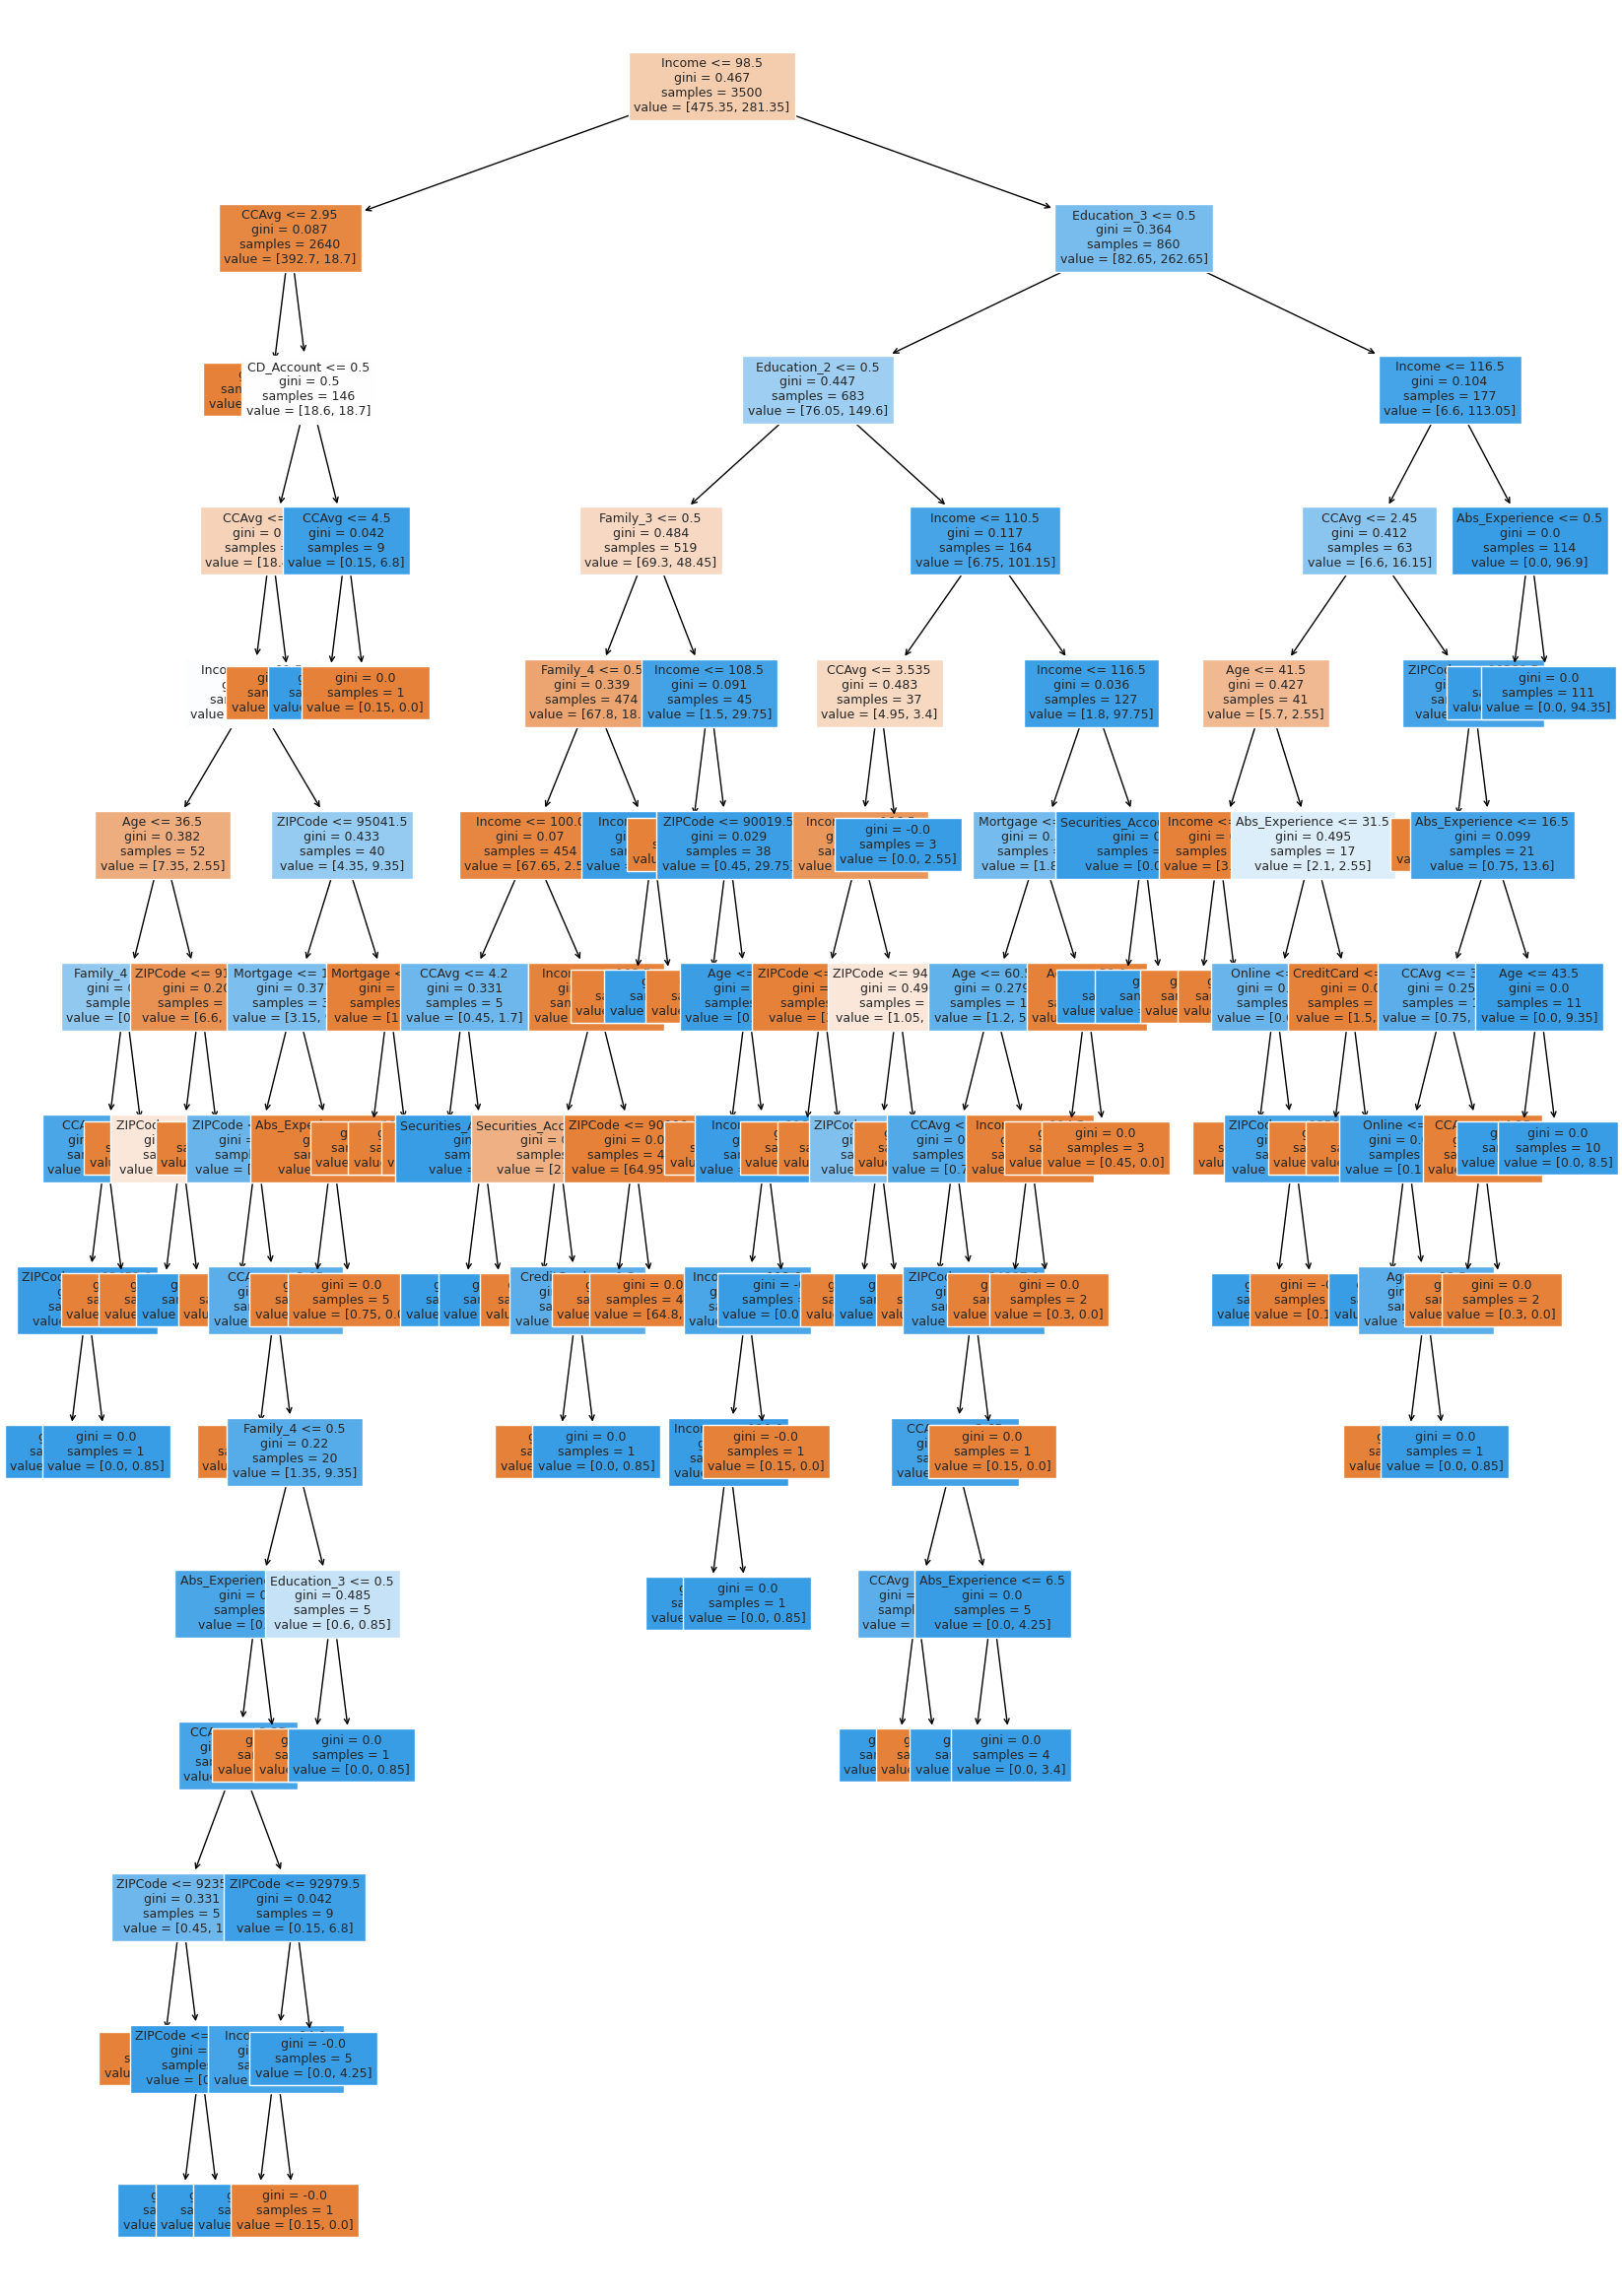

In [219]:
# Set the size of the figure
plt.figure(figsize=(20, 30))

# Plot the decision tree
# 'model' is the trained decision tree model
# 'feature_names' are the names of the features used in the model
# 'filled=True' colors the nodes to indicate majority class
# 'fontsize=9' sets the font size of the text in the nodes
# 'node_ids=False' means don't display the node ids
# 'class_names=None' means don't display the class names
out = tree.plot_tree(model,
                     feature_names=feature_names,
                     filled=True,
                     fontsize=9,
                     node_ids=False,
                     class_names=None)

# Iterate over the generated tree structure
# If an arrow is present (i.e., the node has a child), set its color and line width
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)

# Display the plot
plt.show()



In [220]:
# Text report
print(tree.export_text(model,feature_names=feature_names,show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |   |   |--- CCAvg <= 3.50
|   |   |   |   |   |   |   |   |--- ZIPCode <= 92453.00
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |   |--- ZIPCode >  92453.00
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |--- CCAvg >  3.50
|   |   |   |   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.60, 0.00] class: 0
|   |   |   |   |   |--- Age >  36.50
|   |   |   |   |   |   |--- ZIPCode <= 91269.00
|   |   |   |   |   |   |   |--- ZIPCode <= 90974.00
|   |   |   |   |   |   |   |   |

In [221]:
def plot_feature_importance(decision_tree_model):
    """
    This function plots the importance of features in a bar chart.
    decision_tree_model: A trained decision tree classifier
    """
    feature_importances = decision_tree_model.feature_importances_
    sorted_indices = np.argsort(feature_importances)
    plot_size = len(sorted_indices) // 2  # Adjusting the size of the plot.

    plt.figure(figsize=(10, plot_size))
    plt.title("Importance of Features", fontsize=14)
    plt.barh(range(len(sorted_indices)), feature_importances[sorted_indices], color='blue', align='center')
    plt.yticks(range(len(sorted_indices)), [feature_names[i] for i in sorted_indices])
    plt.xlabel("Relative Importance", fontsize=12)


In [222]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                         Imp
Income              0.592431
Education_2         0.088134
CCAvg               0.085866
Family_4            0.071136
Family_3            0.070324
Education_3         0.037138
ZIPCode             0.017887
CD_Account          0.011000
Age                 0.010398
Mortgage            0.005239
Abs_Experience      0.004911
Securities_Account  0.002769
Online              0.002045
CreditCard          0.000721
Family_2            0.000000


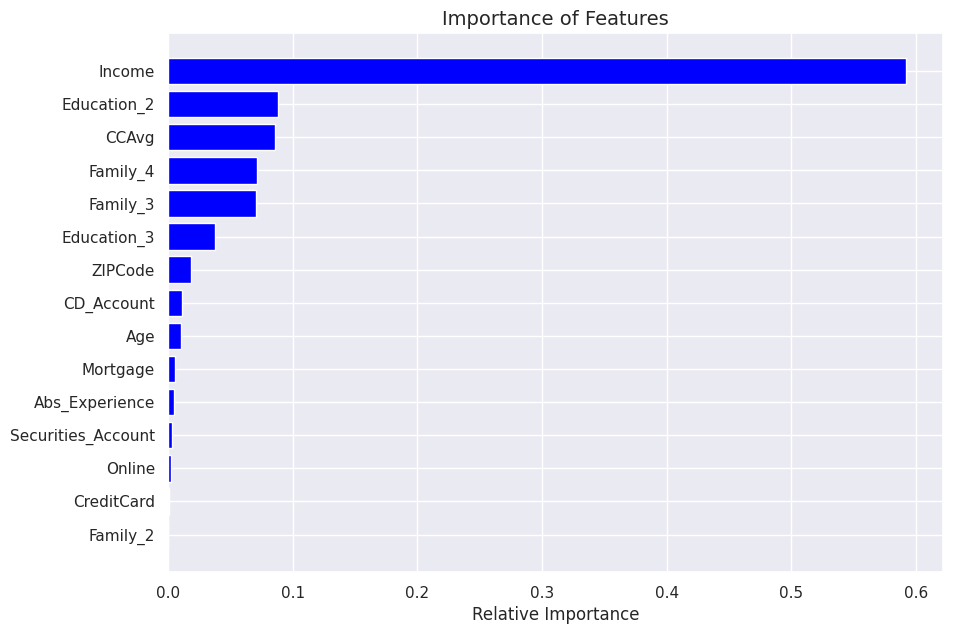

In [223]:
plot_feature_importance(model)

- According to decision tree model, Income is the most important variable to consider for personal loan.

## Reducing the Overfitting

* As a rule of thumb, the more you allow your tree to grow in depth, the more intricate your model becomes due to the increased number of splits. This allows the model to capture more data details, which can lead to overfitting.
* We should consider constraining the maximum depth of the tree to 3.

In [224]:
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=1)
dTree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

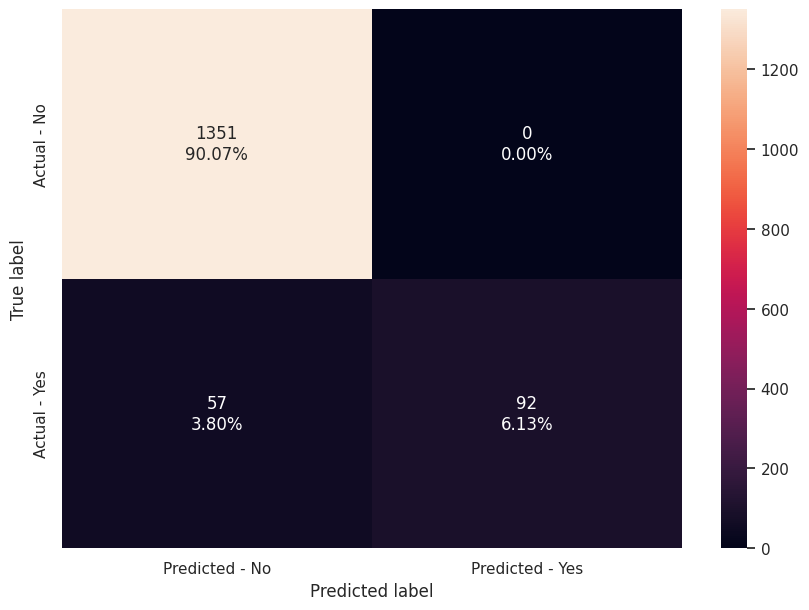

In [225]:
construct_confusion_matrix(dTree1, y_test)

In [226]:
# Recall on train and test
compute_recall_score(dTree1)

Recall score on training set :  0.6706948640483383
Recall score on test set :  0.6174496644295302


- The recall score on the training set is 0.6707 and on the test set is 0.6174.
- The model has a higher recall on the training set compared to the test set.
- This suggests that the model is performing better on the training data.
- However, the difference between the training and test scores is not very large, which is a good sign.
- It suggests that the model is not overfitting to the training data.
- The recall score on the test set is above 0.5, which means the model is able to identify more than half of the positive instances correctly.


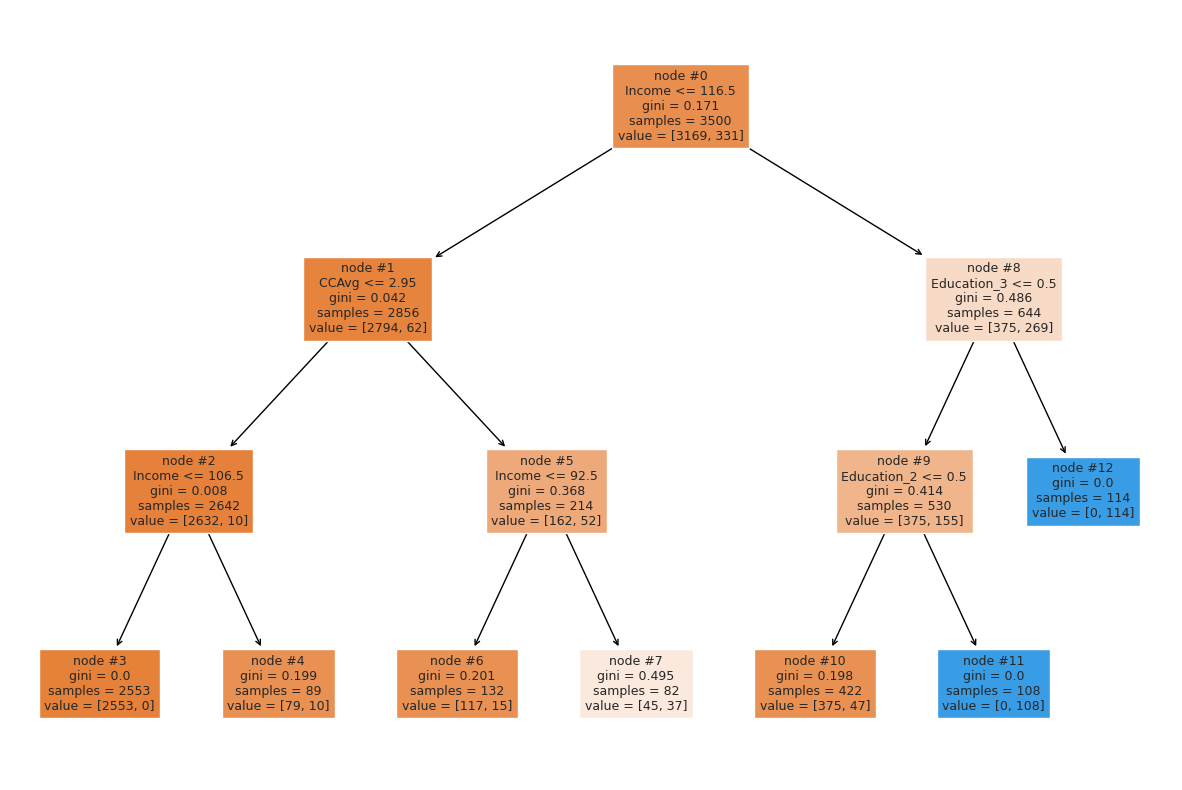

In [227]:
# Set the size of the figure
plt.figure(figsize=(15, 10))

# Plot the decision tree
# 'dtree1' is the trained decision tree model
# 'feature_names' are the names of the features used in the model
# 'filled=True' colors the nodes to indicate majority class
# 'fontsize=9' sets the font size of the text in the nodes
# 'node_ids=True' means display the node ids
# 'class_names=None' means don't display the class names
out = tree.plot_tree(dTree1,
                     feature_names=feature_names,
                     filled=True,
                     fontsize=9,
                     node_ids=True,
                     class_names=None)

# Iterate over the generated tree structure
# If an arrow is present (i.e., the node has a child), set its color and line width
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)

# Display the plot
plt.show()

In [228]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree1,feature_names=list(feature_names),show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- weights: [79.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- weights: [117.00, 15.00] class: 0
|   |   |--- Income >  92.50
|   |   |   |--- weights: [45.00, 37.00] class: 0
|--- Income >  116.50
|   |--- Education_3 <= 0.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- weights: [375.00, 47.00] class: 0
|   |   |--- Education_2 >  0.50
|   |   |   |--- weights: [0.00, 108.00] class: 1
|   |--- Education_3 >  0.50
|   |   |--- weights: [0.00, 114.00] class: 1



In [229]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree1.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                         Imp
Income              0.414261
Education_2         0.315168
Education_3         0.217997
CCAvg               0.052575
Age                 0.000000
ZIPCode             0.000000
Mortgage            0.000000
Securities_Account  0.000000
CD_Account          0.000000
Online              0.000000
CreditCard          0.000000
Abs_Experience      0.000000
Family_2            0.000000
Family_3            0.000000
Family_4            0.000000


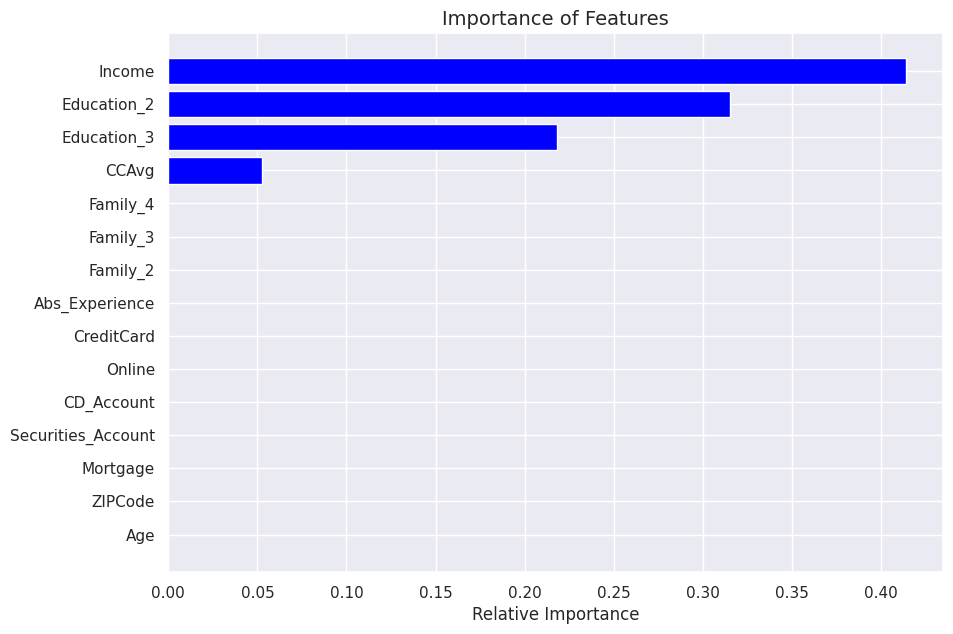

In [230]:
plot_feature_importance(dTree1)

## Observations (Key Comparison between Full Depth vs Depth 3 Tree):
- Root Node Split: Full Depth: Income <= 98.5 Depth 3: Income <= 116.5
- Number of Features Used: Full Depth: Multiple features (10+) Depth 3: Limited features (3)
- Gini Impurity: Full Depth: Varies greatly with depth and splits. Depth 3: Generally higher at each split compared to the full-depth tree.
- Sample Distribution: Full Depth: More granular, with specific conditions leading to smaller sample sizes in deeper nodes. Depth 3: Larger sample sizes at leaf nodes due to fewer splits.
- Interpretability: Full Depth: Less interpretable due to complexity. Depth 3: More interpretable due to simplicity.

## Using GridSearch for hyperparameter tuning of our tree model.

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [231]:
# Select the classifier type - DecisionTreeClassifier in this case
classifier = DecisionTreeClassifier(random_state=1, class_weight={0:.15,1:.85})

# Define the parameter grid for the classifier
param_grid = {'max_depth': np.arange(1,10),
              'criterion': ['entropy','gini'],
              'splitter': ['best','random'],
              'min_impurity_decrease': [0.000001,0.00001,0.0001],
              'max_features': ['log2','sqrt']}

# Define the scoring method to evaluate parameter combinations
scoring_method = metrics.make_scorer(metrics.recall_score)

# Perform grid search on the classifier using the defined parameters and scoring method
grid_search = GridSearchCV(classifier, param_grid=param_grid, scoring=scoring_method, cv=5)
grid_search = grid_search.fit(X_train, y_train)

# Update the classifier with the best parameter combination from the grid search
classifier = grid_search.best_estimator_

# Train the classifier with the best parameter combination on the training data
classifier.fit(X_train, y_train)


DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, criterion='entropy',
                       max_depth=3, max_features='log2',
                       min_impurity_decrease=1e-06, random_state=1)

## Confusion Matrix using GridSearchCV

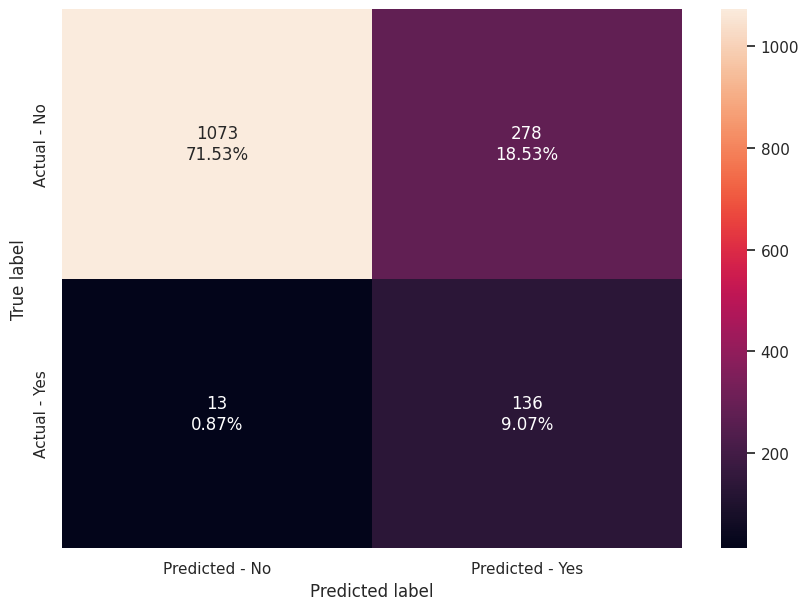

In [232]:
construct_confusion_matrix(classifier, y_test)

## Recall score using GridSearchCV

In [233]:
compute_recall_score(classifier)

Recall score on training set :  0.9546827794561934
Recall score on test set :  0.912751677852349


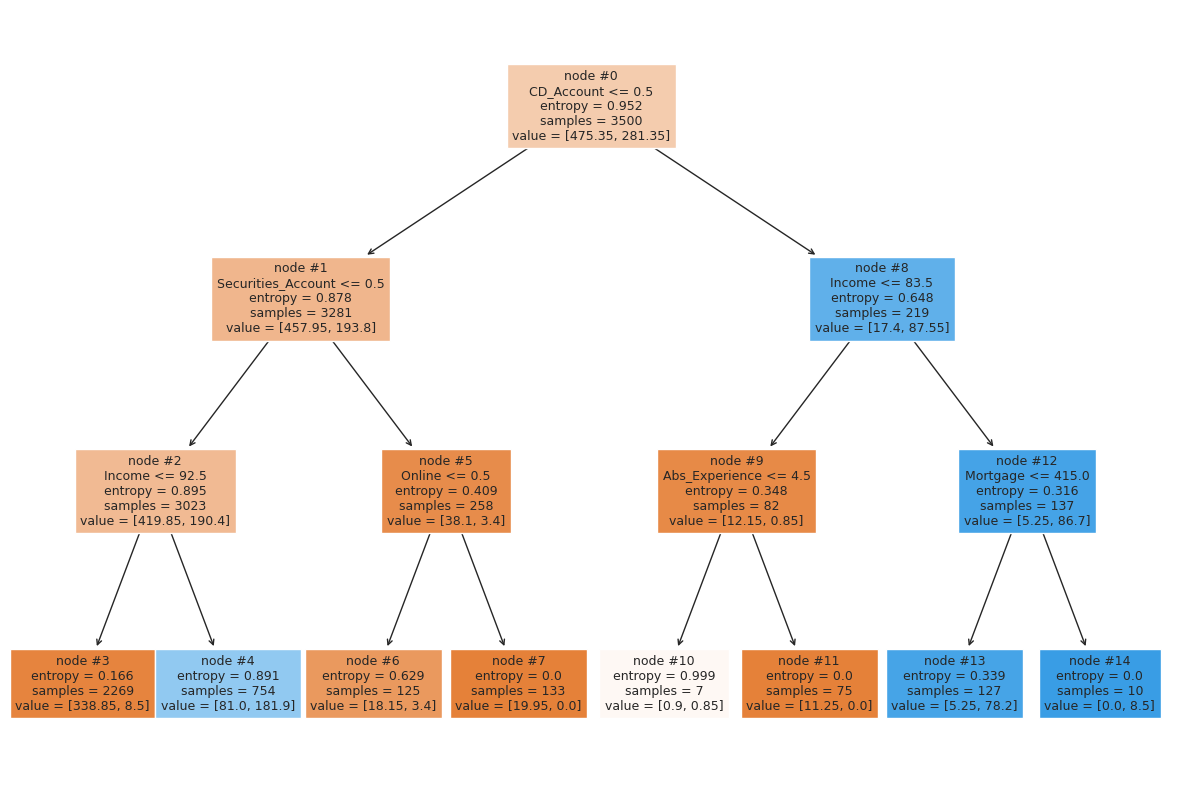

In [234]:
plt.figure(figsize=(15,10))

# Plot the decision tree
# 'classifier' is the trained decision tree model
# 'feature_names' are the names of the features used in the model
# 'filled=True' colors the nodes to indicate majority class
# 'fontsize=9' sets the font size of the text in the nodes
# 'node_ids=True' shows the ID of each node
# 'class_names=None' doesn't show the name of the majority class in each node
tree.plot_tree(classifier, feature_names=feature_names, filled=True, fontsize=9, node_ids=True, class_names=None)

# Display the plot
plt.show()

In [235]:
print(tree.export_text(classifier,feature_names=feature_names,show_weights=True))

|--- CD_Account <= 0.50
|   |--- Securities_Account <= 0.50
|   |   |--- Income <= 92.50
|   |   |   |--- weights: [338.85, 8.50] class: 0
|   |   |--- Income >  92.50
|   |   |   |--- weights: [81.00, 181.90] class: 1
|   |--- Securities_Account >  0.50
|   |   |--- Online <= 0.50
|   |   |   |--- weights: [18.15, 3.40] class: 0
|   |   |--- Online >  0.50
|   |   |   |--- weights: [19.95, 0.00] class: 0
|--- CD_Account >  0.50
|   |--- Income <= 83.50
|   |   |--- Abs_Experience <= 4.50
|   |   |   |--- weights: [0.90, 0.85] class: 0
|   |   |--- Abs_Experience >  4.50
|   |   |   |--- weights: [11.25, 0.00] class: 0
|   |--- Income >  83.50
|   |   |--- Mortgage <= 415.00
|   |   |   |--- weights: [5.25, 78.20] class: 1
|   |   |--- Mortgage >  415.00
|   |   |   |--- weights: [0.00, 8.50] class: 1



## Feature Importance using GridSearchCV.

In [236]:
# The importance of each feature in the decision tree model is calculated. The importance is determined by the
# total reduction of the criterion (Gini impurity or entropy) that is achieved by splitting on the feature,
# normalized by the total reduction of all features. This is often referred to as Gini importance or mean decrease impurity.
feature_importances = pd.DataFrame(classifier.feature_importances_,
                                   columns=["Importance"],
                                   index=X_train.columns)

# The DataFrame is sorted in descending order of importance. This allows us to see which features contribute most to the decision-making process of the model.
sorted_feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the sorted feature importances
sorted_feature_importances


Importance
Income                0.750812
CD_Account            0.208201
Securities_Account    0.022921
Online                0.008875
Abs_Experience        0.007224
Mortgage              0.001968
Age                   0.000000
ZIPCode               0.000000
CCAvg                 0.000000
CreditCard            0.000000
Education_2           0.000000
Education_3           0.000000
Family_2              0.000000
Family_3              0.000000
Family_4              0.000000

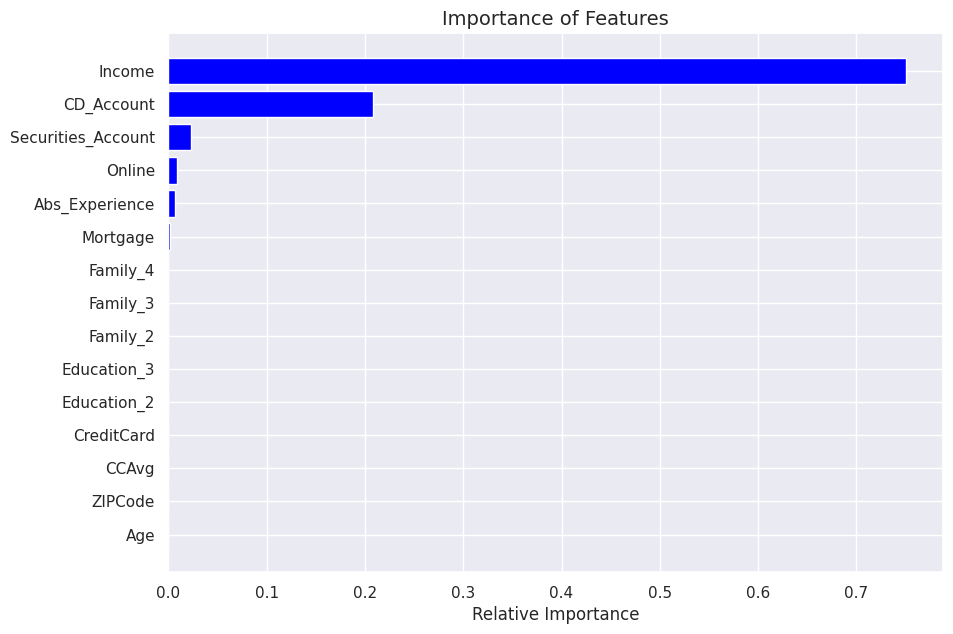

In [237]:
plot_feature_importance(classifier)

## Observations.
- Income (0.750812): Dominant Feature: The model relies heavily on Income, indicating it's the most significant predictor.
- CD_Account (0.208201): Important Feature: CD_Account is also quite influential, but much less than Income.
- Securities_Account (0.022921): Moderately Important: This feature contributes modestly to the predictions.
- Online (0.008875), Abs_Experience (0.007224), Mortgage (0.001968): Minor Importance: These features have low importance but still contribute to some extent.
- Age, ZIPCode, CCAvg, CreditCard, Education_2, Education_3, Family_2, Family_3, Family_4 (0.000000): No Contribution: These features do not contribute to the model's predictions.

<span style="font-family: Helvetica; font-weight:bold;font-size:2.5em;color:navy">Model Performance Improvement</span>

## Cost Complexity Pruning

- The DecisionTreeClassifier offers parameters like min_samples_leaf and max_depth to avoid overfitting.
- Another method to manage the tree's size is through cost complexity pruning. - This pruning strategy in DecisionTreeClassifier is determined by the cost complexity parameter, ccp_alpha.
- As the value of ccp_alpha increases, more nodes are pruned. In this context, we only demonstrate the impact of ccp_alpha on tree regularization and how to select a ccp_alpha value based on validation scores.

## Total Impurity of leaves vs effective alphas of pruned tree.

- Minimal cost complexity pruning recursively finds the node with the "weakest link". The weakest link is characterized by an effective alpha, where the nodes with the smallest effective alpha are pruned first. To get an idea of what values of ccp_alpha could be appropriate, scikit-learn provides DecisionTreeClassifier.cost_complexity_pruning_path that returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process. As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

In [238]:
# Initialize the DecisionTreeClassifier with a specific random state for reproducibility
# and class weights to handle class imbalance
clf = DecisionTreeClassifier(random_state=1, class_weight={0:0.15, 1:0.85})

# Compute the path through the tree along which the cost complexity measure is minimal
# This helps in identifying the alphas at which to prune the tree
path = clf.cost_complexity_pruning_path(X_train, y_train)

# Extract effective alphas and corresponding total leaf impurities from the path
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [239]:
pd.DataFrame(path)

ccp_alphas    impurities
0   0.000000e+00 -6.298297e-15
1   7.482671e-19 -6.297548e-15
2   7.482671e-19 -6.296800e-15
3   7.482671e-19 -6.296052e-15
4   7.482671e-19 -6.295303e-15
5   2.420864e-18 -6.292883e-15
6   2.494224e-18 -6.290388e-15
7   2.905037e-18 -6.287483e-15
8   3.521257e-18 -6.283962e-15
9   4.115469e-18 -6.279847e-15
10  4.665666e-18 -6.275181e-15
11  6.998499e-18 -6.268182e-15
12  7.042514e-18 -6.261140e-15
13  7.394640e-18 -6.253745e-15
14  7.438656e-18 -6.246307e-15
15  8.081285e-17 -6.165494e-15
16  1.143528e-16 -6.051141e-15
17  2.985586e-16 -5.752582e-15
18  1.914713e-04  3.829427e-04
19  1.939508e-04  7.708443e-04
20  1.972347e-04  1.165314e-03
21  3.369896e-04  1.502303e-03
22  3.643130e-04  1.866616e-03
23  3.685823e-04  2.972363e-03
24  3.744328e-04  3.346796e-03
25  3.879017e-04  3.734698e-03
26  3.885915e-04  4.511881e-03
27  3.928099e-04  4.904691e-03
28  4.778878e-04  6.338354e-03
29  5.860688e-04  6.924423e-03
30  6.160535e-04  8.772584e-03
31  6.284400e-04  1.065790e-02
32  6.546462e-04  1.131255e-02
33  6.554717e-04  1.196802e-02
34  6.758139e-04  1.264384e-02
35  8.789656e-04  1.352280e-02
36  9.093369e-04  1.443214e-02
37  9.404360e-04  1.537257e-02
38  9.407728e-04  1.725412e-02
39  9.951370e-04  1.924439e-02
40  1.011155e-03  2.025555e-02
41  1.013173e-03  2.126872e-02
42  1.018946e-03  2.228767e-02
43  1.086501e-03  2.337417e-02
44  1.434181e-03  2.480835e-02
45  1.619124e-03  2.642747e-02
46  1.638043e-03  2.806552e-02
47  1.686407e-03  3.143833e-02
48  2.602631e-03  3.404096e-02
49  2.742431e-03  3.678339e-02
50  3.335999e-03  4.011939e-02
51  3.409906e-03  4.352930e-02
52  3.527226e-03  4.705652e-02
53  4.797122e-03  5.665076e-02
54  5.138280e-03  6.178904e-02
55  6.725814e-03  6.851486e-02
56  2.253222e-02  9.104708e-02
57  3.057320e-02  2.133399e-01
58  2.537957e-01  4.671356e-01

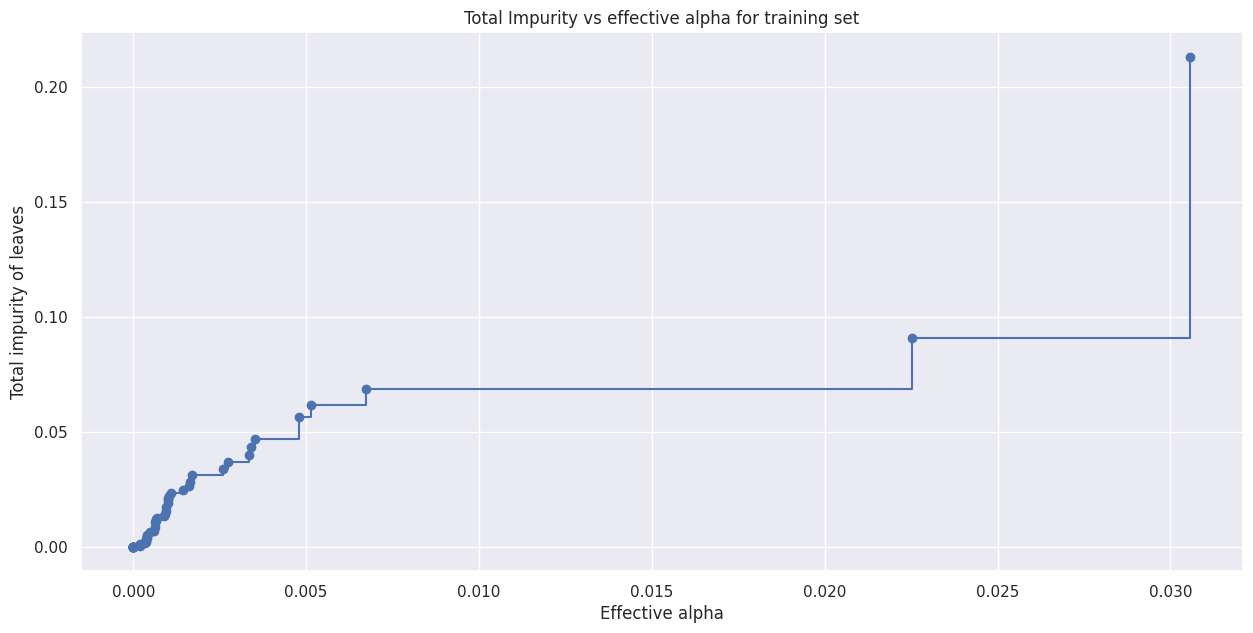

In [240]:
# Create a new figure and a set of subplots. This returns a Figure and an Axes object.
fig, ax = plt.subplots(figsize=(15, 7))

# Plot the impurities vs effective alphas. We exclude the last element in ccp_alphas and impurities
# as it corresponds to the trivial tree with only one leaf.
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")

# Set the label for the x-axis
ax.set_xlabel("Effective alpha")

# Set the label for the y-axis
ax.set_ylabel("Total impurity of leaves")

# Set the title of the plot
ax.set_title("Total Impurity vs effective alpha for training set")

# Display the plot
plt.show()


Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [241]:
# Initialize an empty list to store the classifiers
clfs = []

# Loop over the list of effective alphas
for ccp_alpha in ccp_alphas:
    # Initialize the DecisionTreeClassifier with a specific random state for reproducibility,
    # the current value of ccp_alpha for pruning, and class weights to handle class imbalance
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha, class_weight={0:0.15, 1:0.85})

    # Fit the classifier to the training data
    clf.fit(X_train, y_train)

    # Append the trained classifier to the list
    clfs.append(clf)

# Print the number of nodes and the value of ccp_alpha for the last tree in the list
print(f"Number of nodes in the last tree is: {clfs[-1].tree_.node_count} with ccp_alpha: {ccp_alphas[-1]}")


Number of nodes in the last tree is: 1 with ccp_alpha: 0.2537957148948104


For the remainder, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

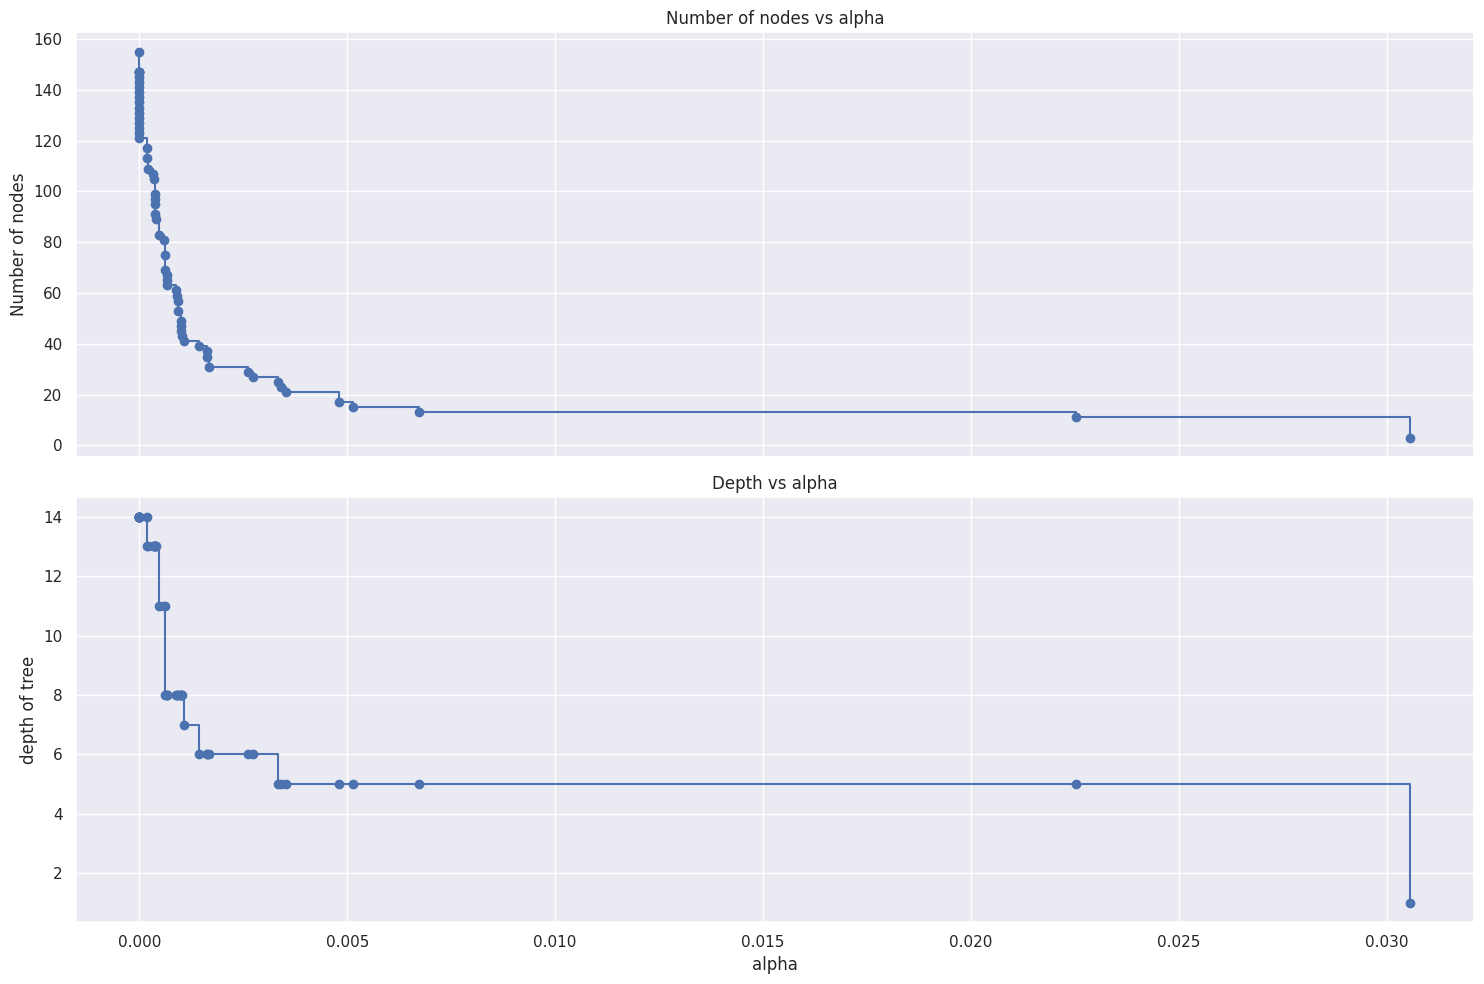

In [242]:
# Exclude the last element in the list of classifiers and alphas as it corresponds to the trivial tree with only one leaf
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Compute the number of nodes and the maximum depth of the tree for each classifier
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

# Create a new figure and a set of subplots. This returns a Figure and an Axes object.
fig, ax = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Plot the number of nodes vs effective alphas
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_ylabel("Number of nodes")
ax[0].set_title("Number of nodes vs alpha")

# Plot the depth of the tree vs effective alphas
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")

# Adjust the padding between and around the subplots
fig.tight_layout()


# Accuracy vs alpha for training and testing sets
When ccp_alpha is set to zero and keeping the other default parameters of DecisionTreeClassifier, the tree overfits, leading to a 100% training accuracy and 69% testing accuracy. As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better.

In [243]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

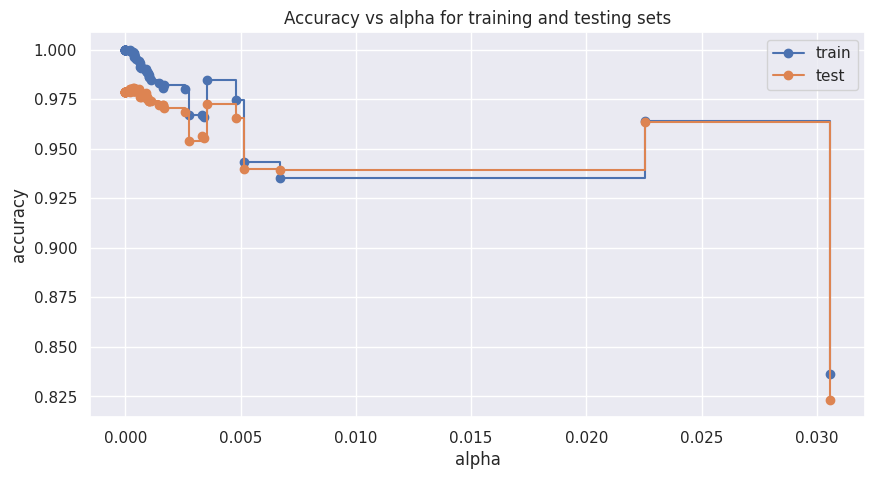

In [244]:
# Create a new figure and a set of subplots. This returns a Figure and an Axes object.
fig, ax = plt.subplots(figsize=(10,5))

# Set the label for the x-axis
ax.set_xlabel("alpha")

# Set the label for the y-axis
ax.set_ylabel("accuracy")

# Set the title of the plot
ax.set_title("Accuracy vs alpha for training and testing sets")

# Plot the training scores vs effective alphas
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")

# Plot the testing scores vs effective alphas
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")

# Add a legend to the plot
ax.legend()

# Display the plot
plt.show()


In [245]:
# Find the index of the model with the highest test score
index_best_model = np.argmax(test_scores)

# Select the best model using the index of the best model
best_model = clfs[index_best_model]

# Print the best model
print(best_model)

# Print the training accuracy of the best model
print('Training accuracy of best model: ', best_model.score(X_train, y_train))

# Print the testing accuracy of the best model
print('Test accuracy of best model: ', best_model.score(X_test, y_test))


DecisionTreeClassifier(ccp_alpha=0.000336989559931298,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)
Training accuracy of best model:  0.9988571428571429
Test accuracy of best model:  0.9806666666666667


Since accuracy isn't the right metric for our data we would want high recall

In [246]:
# Initialize an empty list to store the recall scores for the training data
recall_train = []

# Loop over the list of classifiers
for clf in clfs:
    # Use the classifier to predict the labels for the training data
    pred_train3 = clf.predict(X_train)

    # Compute the recall score for the training data
    values_train = metrics.recall_score(y_train, pred_train3)

    # Append the recall score to the list
    recall_train.append(values_train)


In [247]:
# Initialize an empty list to store the recall scores for the testing data
recall_test = []

# Loop over the list of classifiers
for clf in clfs:
    # Use the classifier to predict the labels for the testing data
    pred_test3 = clf.predict(X_test)

    # Compute the recall score for the testing data
    values_test = metrics.recall_score(y_test, pred_test3)

    # Append the recall score to the list
    recall_test.append(values_test)


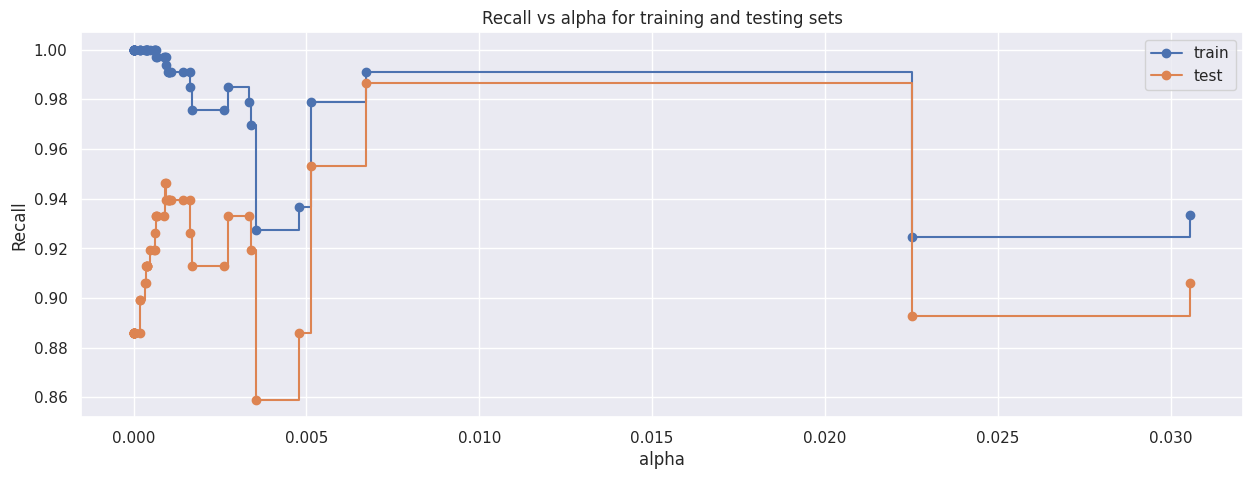

In [248]:
# Create a new figure and a set of subplots. This returns a Figure and an Axes object.
fig, ax = plt.subplots(figsize=(15,5))

# Set the label for the x-axis
ax.set_xlabel("alpha")

# Set the label for the y-axis
ax.set_ylabel("Recall")

# Set the title of the plot
ax.set_title("Recall vs alpha for training and testing sets")

# Plot the recall scores for the training data vs effective alphas
ax.plot(ccp_alphas, recall_train, marker='o', label="train", drawstyle="steps-post")

# Plot the recall scores for the testing data vs effective alphas
ax.plot(ccp_alphas, recall_test, marker='o', label="test", drawstyle="steps-post")

# Add a legend to the plot
ax.legend()

# Display the plot
plt.show()


In [249]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.006725813690406986,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)


In [250]:
# creating the model where we get highest train and test recall
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.006725813690406986,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

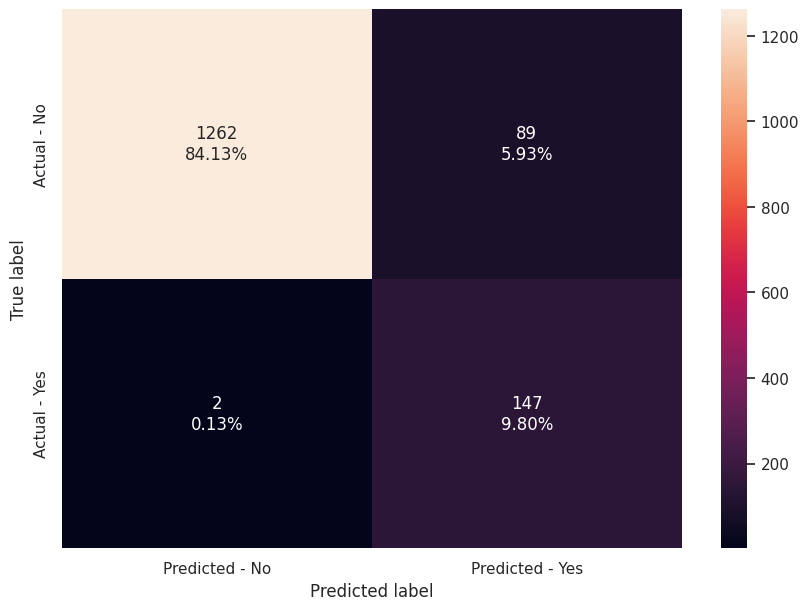

In [251]:
construct_confusion_matrix(best_model, y_test)

In [252]:
compute_recall_score(best_model)

Recall score on training set :  0.9909365558912386
Recall score on test set :  0.9865771812080537


- The model demonstrates high recall scores on both the training set (0.9909) and the test set (0.9865). This indicates that the model is highly effective at identifying positive cases, and the performance is consistent across both seen (training) and unseen (test) data. The slight difference between the training and test scores suggests that the model generalizes well and is not overfitting. Overall, the model’s performance in terms of recall is excellent. Let me know if you need further assistance

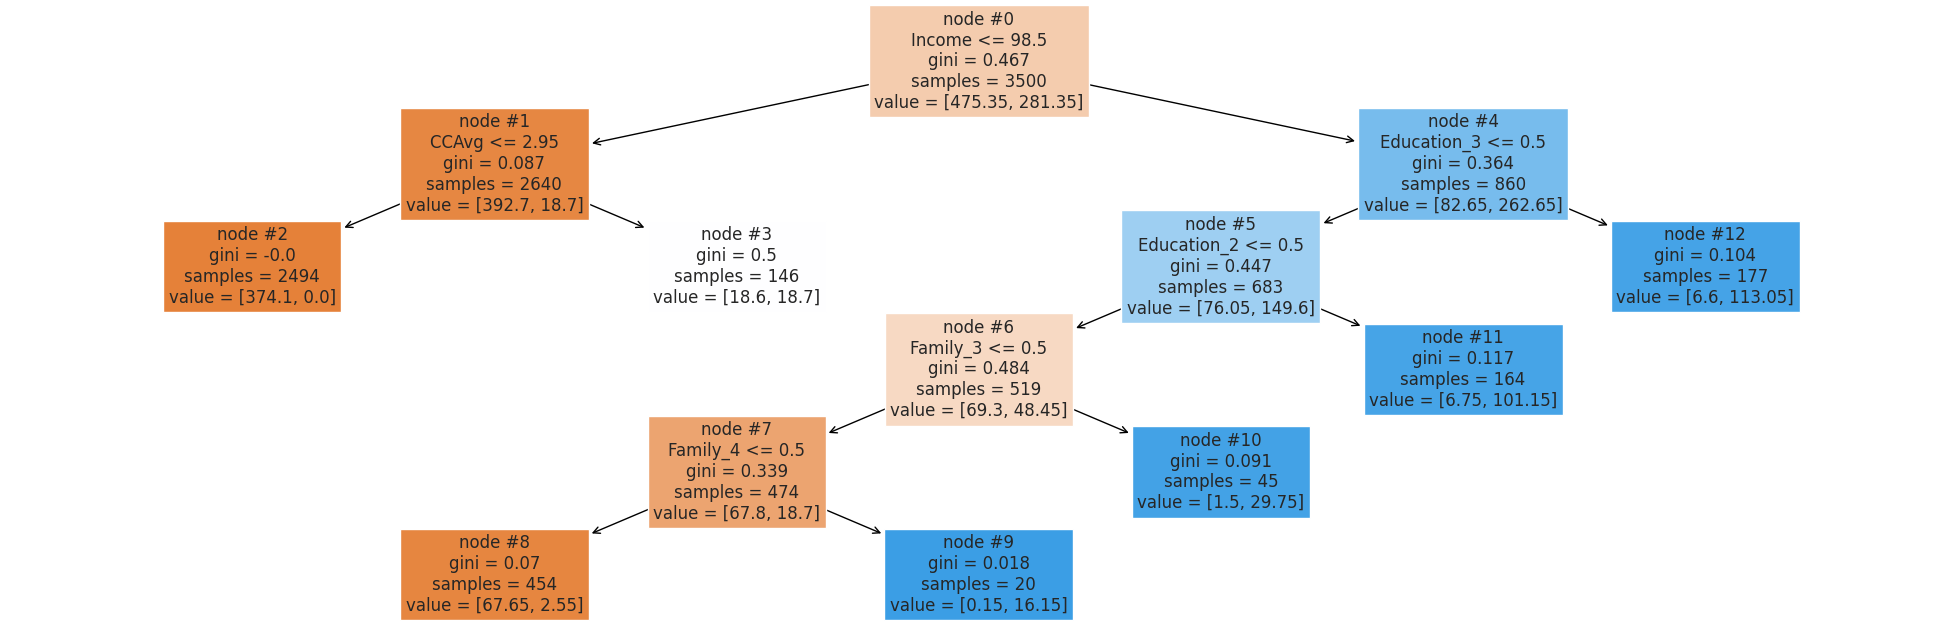

In [253]:
# Create a new figure with specified size
plt.figure(figsize=(25, 8))

# Plot the decision tree of the best model. The 'filled' parameter colors the nodes to
# indicate majority class for classification, levels of a target for regression, or
# impurity for multi-output. The 'node_ids' parameter numbers each node in the graph.
out = tree.plot_tree(best_model,
                     feature_names=feature_names,
                     filled=True,
                     fontsize=12,
                     node_ids=True,
                     class_names=None)

# Loop over the nodes in the plotted tree
for o in out:
    # Get the arrow object of the node, if it exists
    arrow = o.arrow_patch

    # If the node has an arrow object (i.e., it is not a leaf node)
    if arrow is not None:
        # Set the edge color of the arrow to black
        arrow.set_edgecolor('black')

        # Set the line width of the arrow
        arrow.set_linewidth(1)

# Display the plot
plt.show()


In [254]:
# Text report showing the rules of a decision tree -
print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [18.60, 18.70] class: 1
|--- Income >  98.50
|   |--- Education_3 <= 0.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- Family_3 <= 0.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- weights: [67.65, 2.55] class: 0
|   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |--- weights: [0.15, 16.15] class: 1
|   |   |   |--- Family_3 >  0.50
|   |   |   |   |--- weights: [1.50, 29.75] class: 1
|   |   |--- Education_2 >  0.50
|   |   |   |--- weights: [6.75, 101.15] class: 1
|   |--- Education_3 >  0.50
|   |   |--- weights: [6.60, 113.05] class: 1



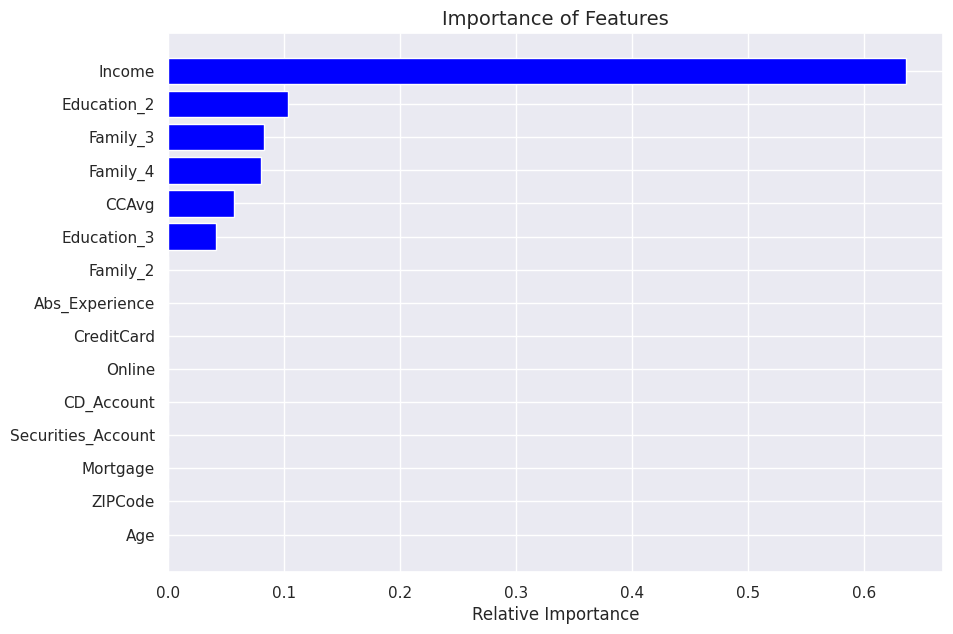

In [255]:
plot_feature_importance(best_model)

In [256]:
# create best_model2 with ccp_alpha as 0.01
best_model2 = DecisionTreeClassifier(ccp_alpha=0.01,
                                     class_weight={0: 0.15, 1: 0.85},
                                     random_state=1)
best_model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

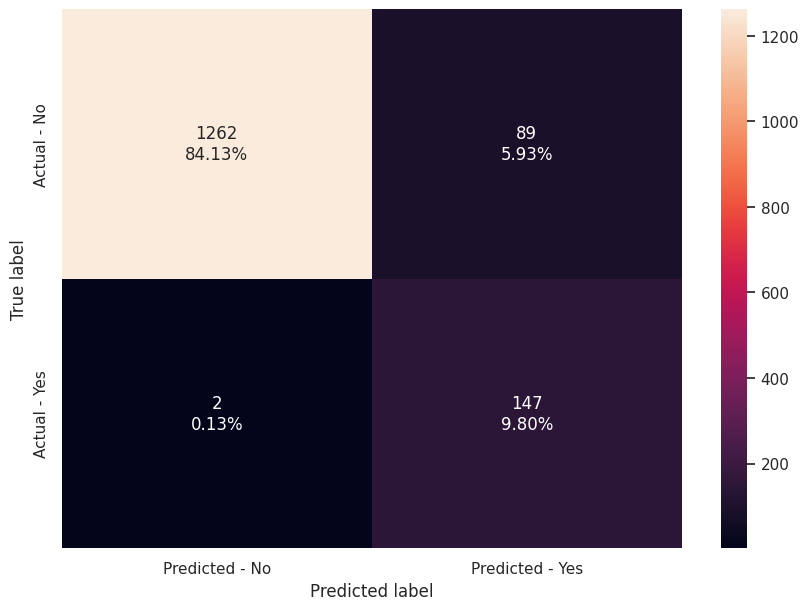

In [257]:
# construct confusion matrix on best_model2
construct_confusion_matrix(best_model2, y_test)

In [258]:
compute_recall_score(best_model2)

Recall score on training set :  0.9909365558912386
Recall score on test set :  0.9865771812080537


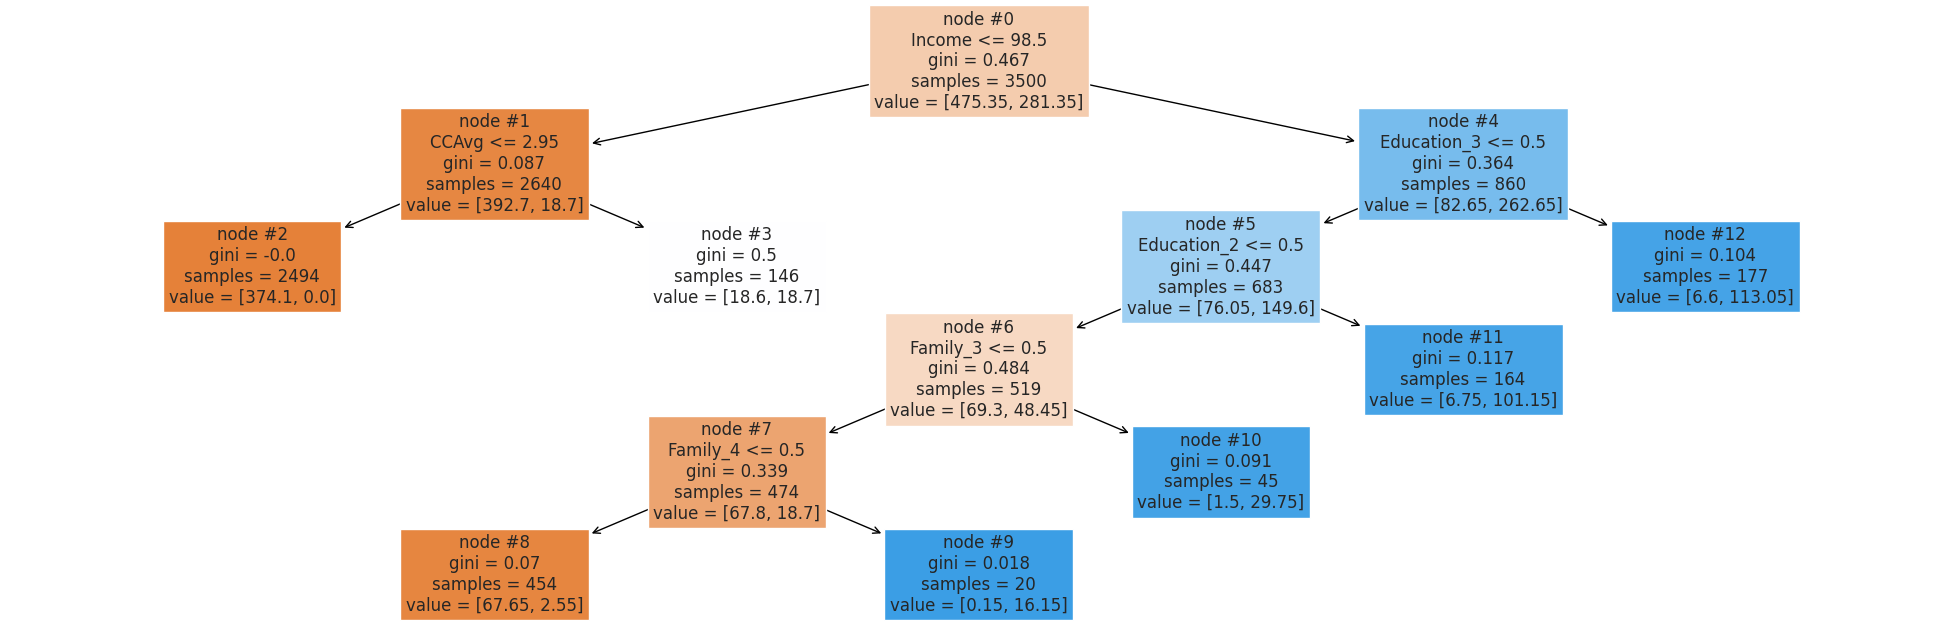

In [259]:
plt.figure(figsize=(25, 8))

out = tree.plot_tree(best_model2,
                     feature_names=feature_names,
                     filled=True,
                     fontsize=12,
                     node_ids=True,
                     class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [260]:
print(tree.export_text(best_model2, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [18.60, 18.70] class: 1
|--- Income >  98.50
|   |--- Education_3 <= 0.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- Family_3 <= 0.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- weights: [67.65, 2.55] class: 0
|   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |--- weights: [0.15, 16.15] class: 1
|   |   |   |--- Family_3 >  0.50
|   |   |   |   |--- weights: [1.50, 29.75] class: 1
|   |   |--- Education_2 >  0.50
|   |   |   |--- weights: [6.75, 101.15] class: 1
|   |--- Education_3 >  0.50
|   |   |--- weights: [6.60, 113.05] class: 1



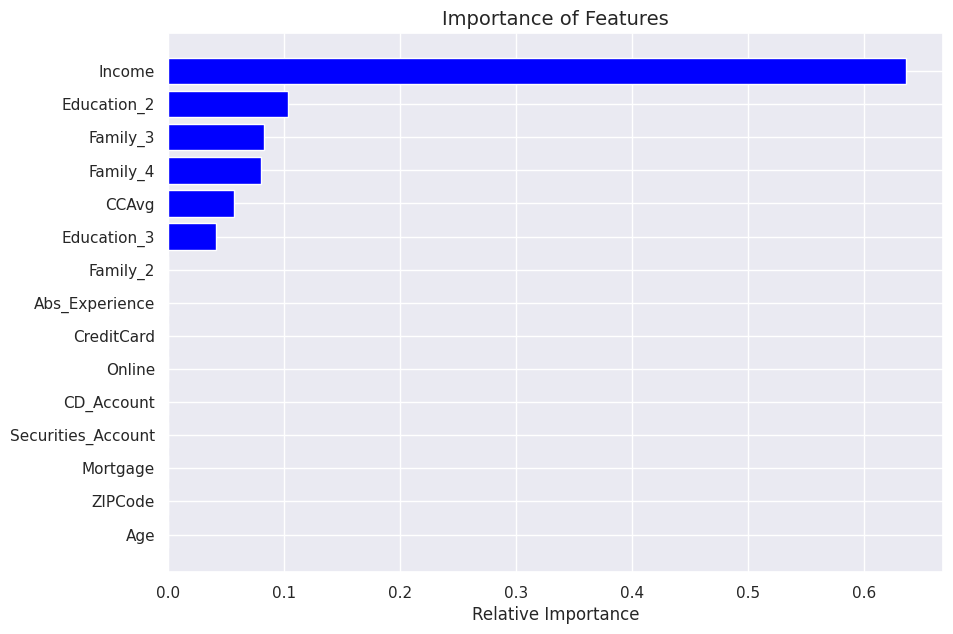

In [261]:
plot_feature_importance(best_model2)

<span style="font-family: Helvetica; font-weight:bold;font-size:2.5em;color:navy">Model Comparison and Final Model Selection</span>

In [262]:
import pandas as pd

# Create a DataFrame for the provided data
comparison_frame = pd.DataFrame({
    'Model': [
        'Initial decision tree model',
        'with max depth 3',
        'with GridSearchCV',
        'with post-pruning (ccp_alpha=0.006)',
        'with post-pruning (ccp_alpha=0.01)'
    ],
    'Train_Recall': [
        1.0,
        0.6706948640483383,
        0.9546827794561934,
        0.9909365558912386,
        0.9909365558912386
    ],
    'Test_Recall': [
        0.8859060402684564,
        0.6174496644295302,
        0.912751677852349,
        0.9865771812080537,
        0.9865771812080537
    ]
})

# Print the DataFrame
comparison_frame


Model  Train_Recall  Test_Recall
0          Initial decision tree model      1.000000     0.885906
1                     with max depth 3      0.670695     0.617450
2                    with GridSearchCV      0.954683     0.912752
3  with post-pruning (ccp_alpha=0.006)      0.990937     0.986577
4   with post-pruning (ccp_alpha=0.01)      0.990937     0.986577

<span style="font-family: Helvetica; font-weight:bold;font-size:2.5em;color:navy">Actionable Insights and Business Recommendations</span>


## Conclusion

- The “Potential Loan Marketing Data” was examined using various methods, and a predictive model was constructed using a Decision Tree Classifier. This model aids in predicting whether a liability customer will opt for a personal loan. The most significant predictors for potential loan customers are income, education, family size, and credit card usage.

- Customers with separate securities and CD accounts are more inclined to take a personal loan. Similarly, customers who utilize the bank's online services are more likely to secure a personal loan compared to those who do not.

- The importance of hyperparameters and pruning in mitigating overfitting during the model selection process was underscored.

## Recommendations
- According to the decision tree model, income is the most influential factor. There's a high likelihood that customers with an annual income less than 98.5K won't opt for a personal loan.
- The model suggests that customers with an income greater than 98.5K and an education level of 3 (Advanced/Professional) or higher are most likely to have a personal loan. Therefore, it's recommended to target customers with incomes lower than 98K.
- It was observed that customers who use online facilities are more likely to have personal loans. Hence, enhancing the user-friendliness of the site and encouraging non-users to utilize online facilities could be beneficial.
- Simplifying the personal loan application process to provide a better user experience is also recommended.

___

In [263]:
!pip install nbconvert

In [265]:
!jupyter nbconvert --to html '/content/drive/MyDrive/Colab Notebooks/AllLife_Bank_Personal_Loan_Campign_Modelling.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/AllLife_Bank_Personal_Loan_Campign_Modelling.ipynb to html
[NbConvertApp] Writing 4790267 bytes to /content/drive/MyDrive/Colab Notebooks/AllLife_Bank_Personal_Loan_Campign_Modelling.html
